In [1]:
# Import necessary modules

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from scipy import stats

C:\Users\navee\AppData\Local\Temp\ipykernel_8144\868399871.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
# Load the data

df = pd.read_csv(r"D:\INeuron_Projects\Concrete_Com Test Pred\concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# rename fine_aggregate fetaure

df = df.rename(columns={'fine_aggregate ': 'fine_aggregate'})




In [4]:
# remow dupicate rows

df = df.drop_duplicates()

In [5]:
# copies of data useful for further models and invistegation

df1 = df.copy()
df2 = df.copy()


In [6]:
#calculate absolute z scores 

z_scores = np.abs(stats.zscore(df))

z_scores = np.abs(stats.zscore(df))

# create boolean mask for outliers
outliers_mask = (z_scores > 3).any(axis=1)

# create new DataFrame with outliers only
df_outliers = df[outliers_mask]

df_outliers.head(50)

df_outliers.to_csv('outliers_zscore.csv', index=False)

In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df['age'].value_counts()

28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [9]:
# check outliers in each feature 

features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age']

# Calculate the lower and upper fences for outliers
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Count the number of outliers below the lower fence
    lower_outliers_count = df[df[feature] < lower_fence].shape[0]
    lower_outliers = df[df[feature] < lower_fence]
    # Count the number of outliers above the upper fence
    upper_outliers_count = df[df[feature] > upper_fence].shape[0]
    upper_outliers = df[df[feature] > upper_fence]

    print("Feature:", feature)
    print("Number of Lower Outliers:", lower_outliers_count)
    print("Number of Upper Outliers:", upper_outliers_count)
    
    print("-------------------------------------------")

Feature: cement
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: blast_furnace_slag
Number of Lower Outliers: 0
Number of Upper Outliers: 2
-------------------------------------------
Feature: fly_ash
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: water
Number of Lower Outliers: 11
Number of Upper Outliers: 4
-------------------------------------------
Feature: superplasticizer
Number of Lower Outliers: 0
Number of Upper Outliers: 10
-------------------------------------------
Feature: coarse_aggregate
Number of Lower Outliers: 0
Number of Upper Outliers: 0
-------------------------------------------
Feature: fine_aggregate
Number of Lower Outliers: 0
Number of Upper Outliers: 5
-------------------------------------------
Feature: age
Number of Lower Outliers: 0
Number of Upper Outliers: 59
-------------------------------------------


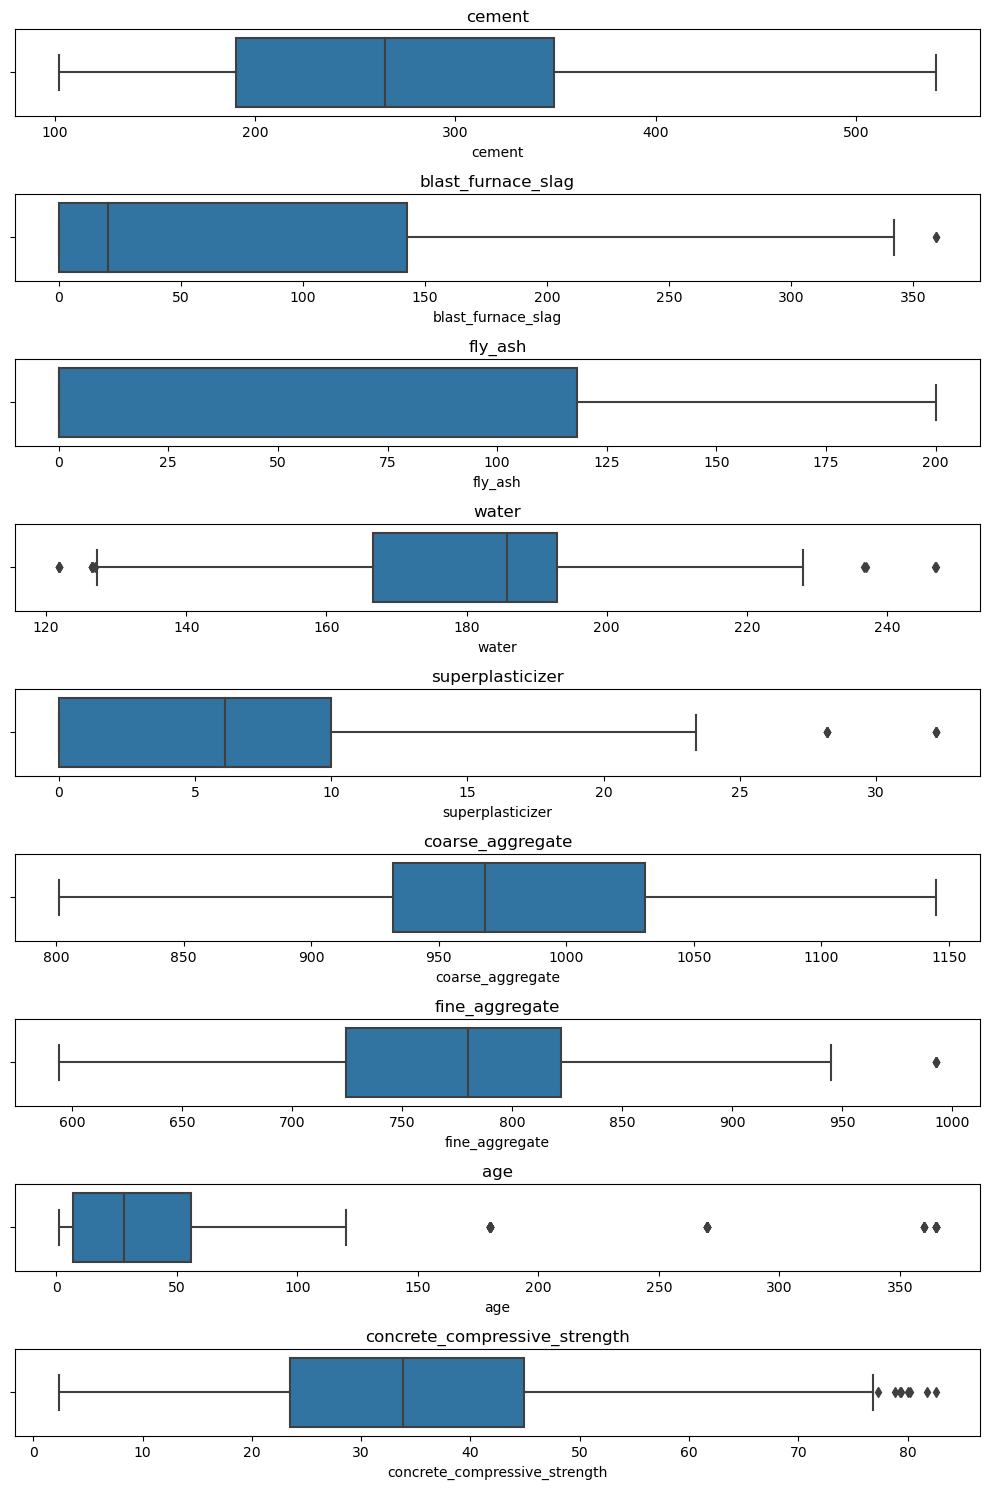

In [87]:

# Set the size of the figure
plt.figure(figsize=(10, 15))

# For each feature, create a subplot and draw a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

# Display the plot
plt.tight_layout()
plt.show()


In [11]:
from feature_engine.outliers import Winsorizer

feature_to_win = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate']

win = Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables = feature_to_win)

win.fit(df)
df_win = win.transform(df)

df_win.head(10)       

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


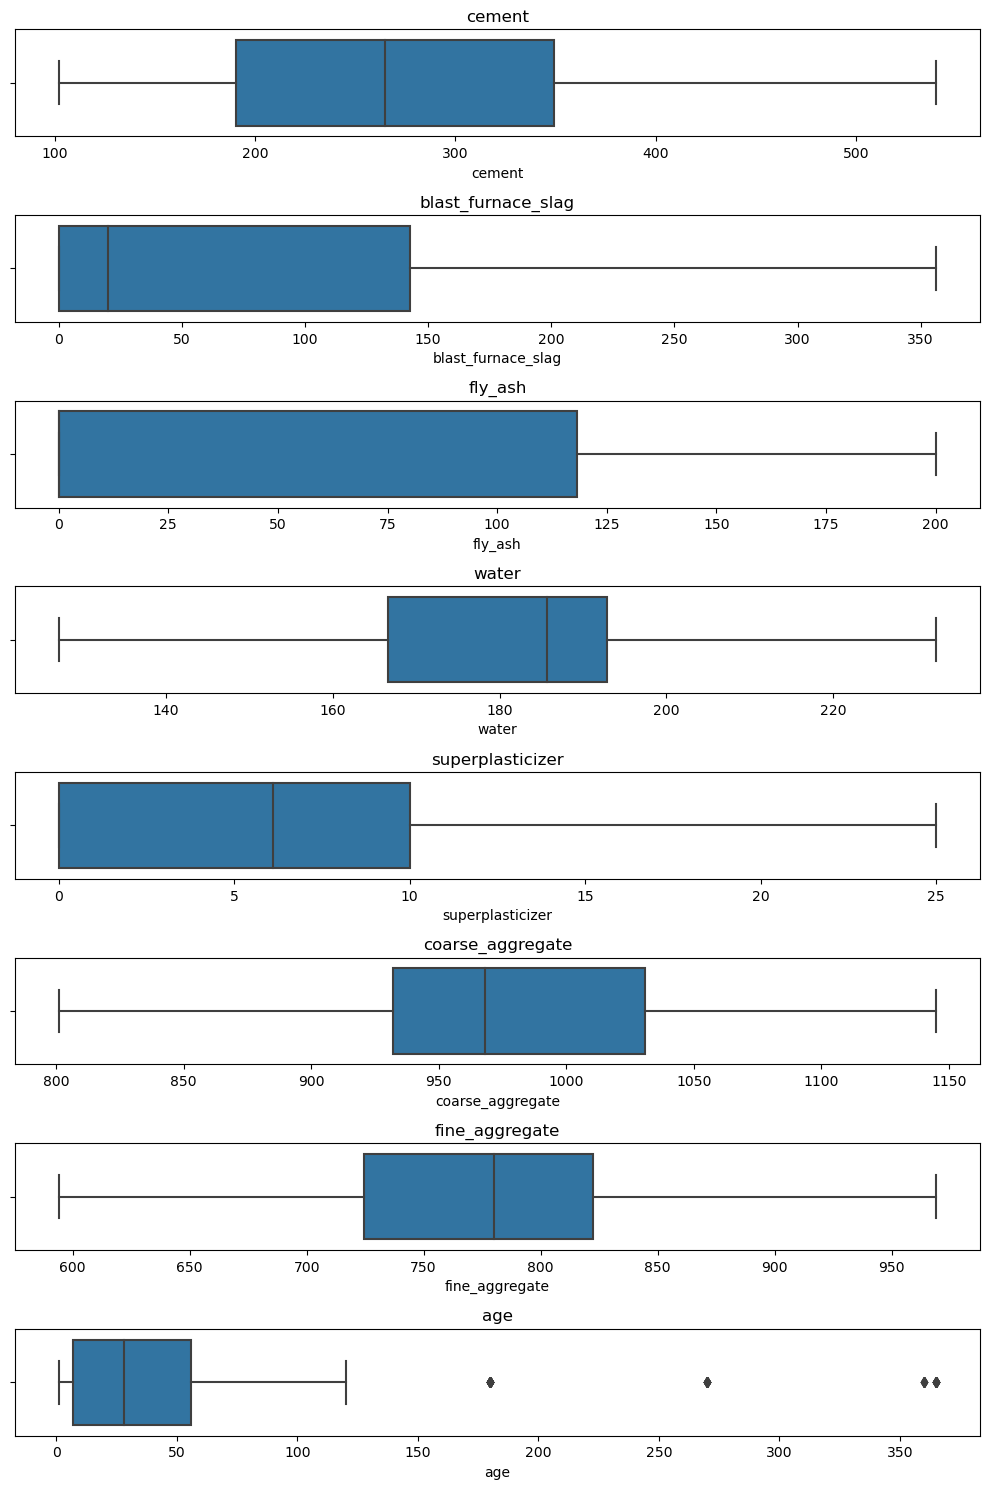

In [12]:
# Set the size of the figure
plt.figure(figsize=(10, 15))

# For each feature, create a subplot and draw a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df_win[feature])
    plt.title(feature)

# Display the plot
plt.tight_layout()
plt.show()


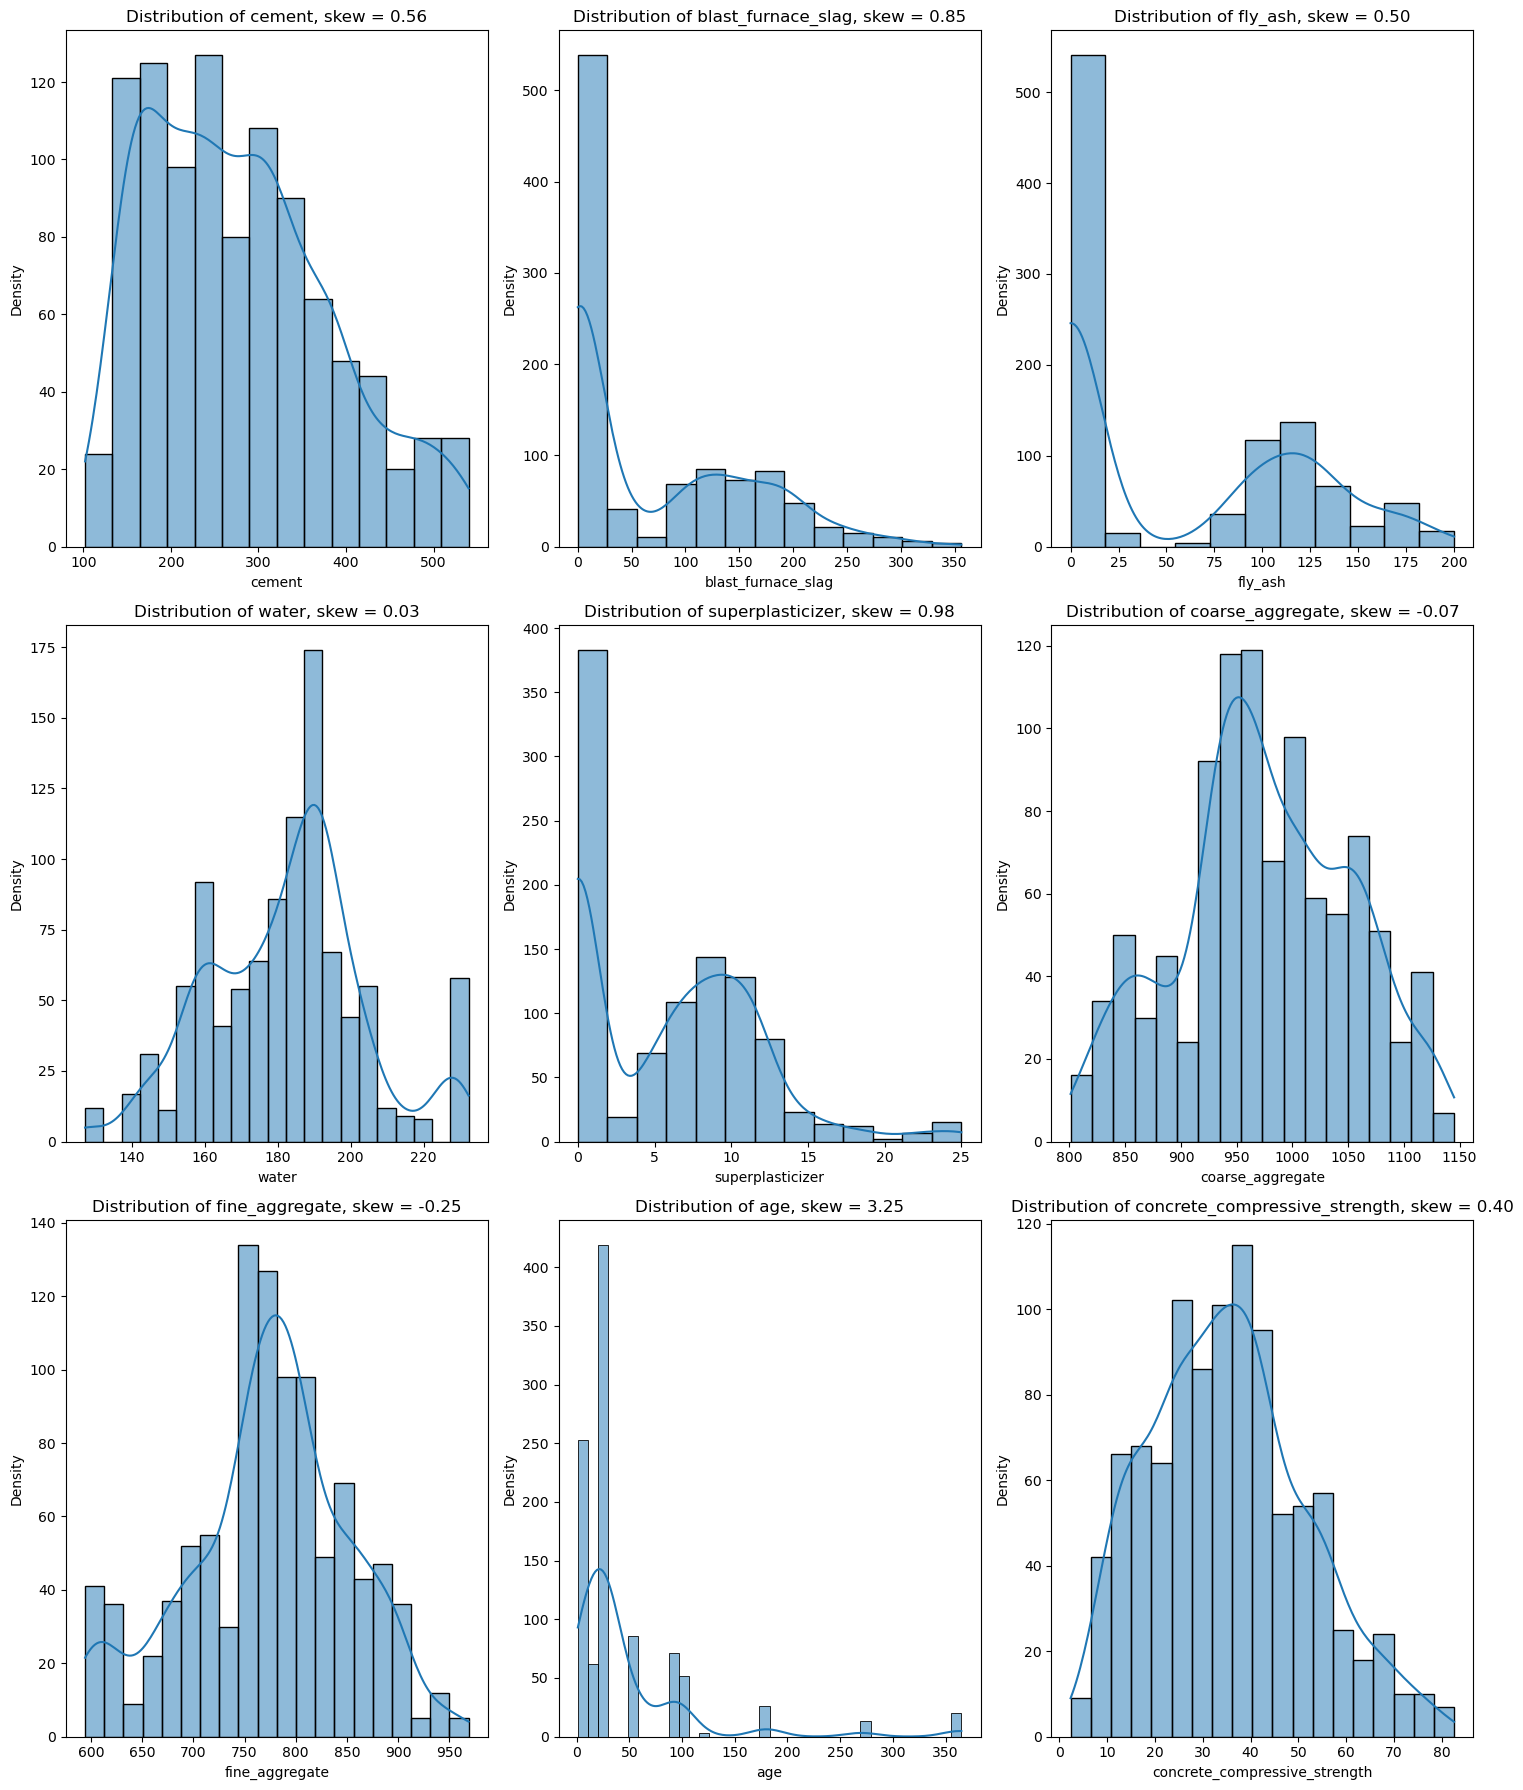

In [13]:


features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

num_plots = len(features)
num_rows = num_plots // 3 + num_plots % 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(df_win[feature], kde=True, ax=ax)
    skewness = stats.skew(df[feature])
    ax.set_title(f"Distribution of {feature}, skew = {skewness:.2f}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

# Remove any unused subplots
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()

In [14]:
# Specify the features to apply log transformation
features = ['age']

# Apply log transformation to the selected features
for feature in features:
    df_win[feature] = np.log1p(df_win[feature])

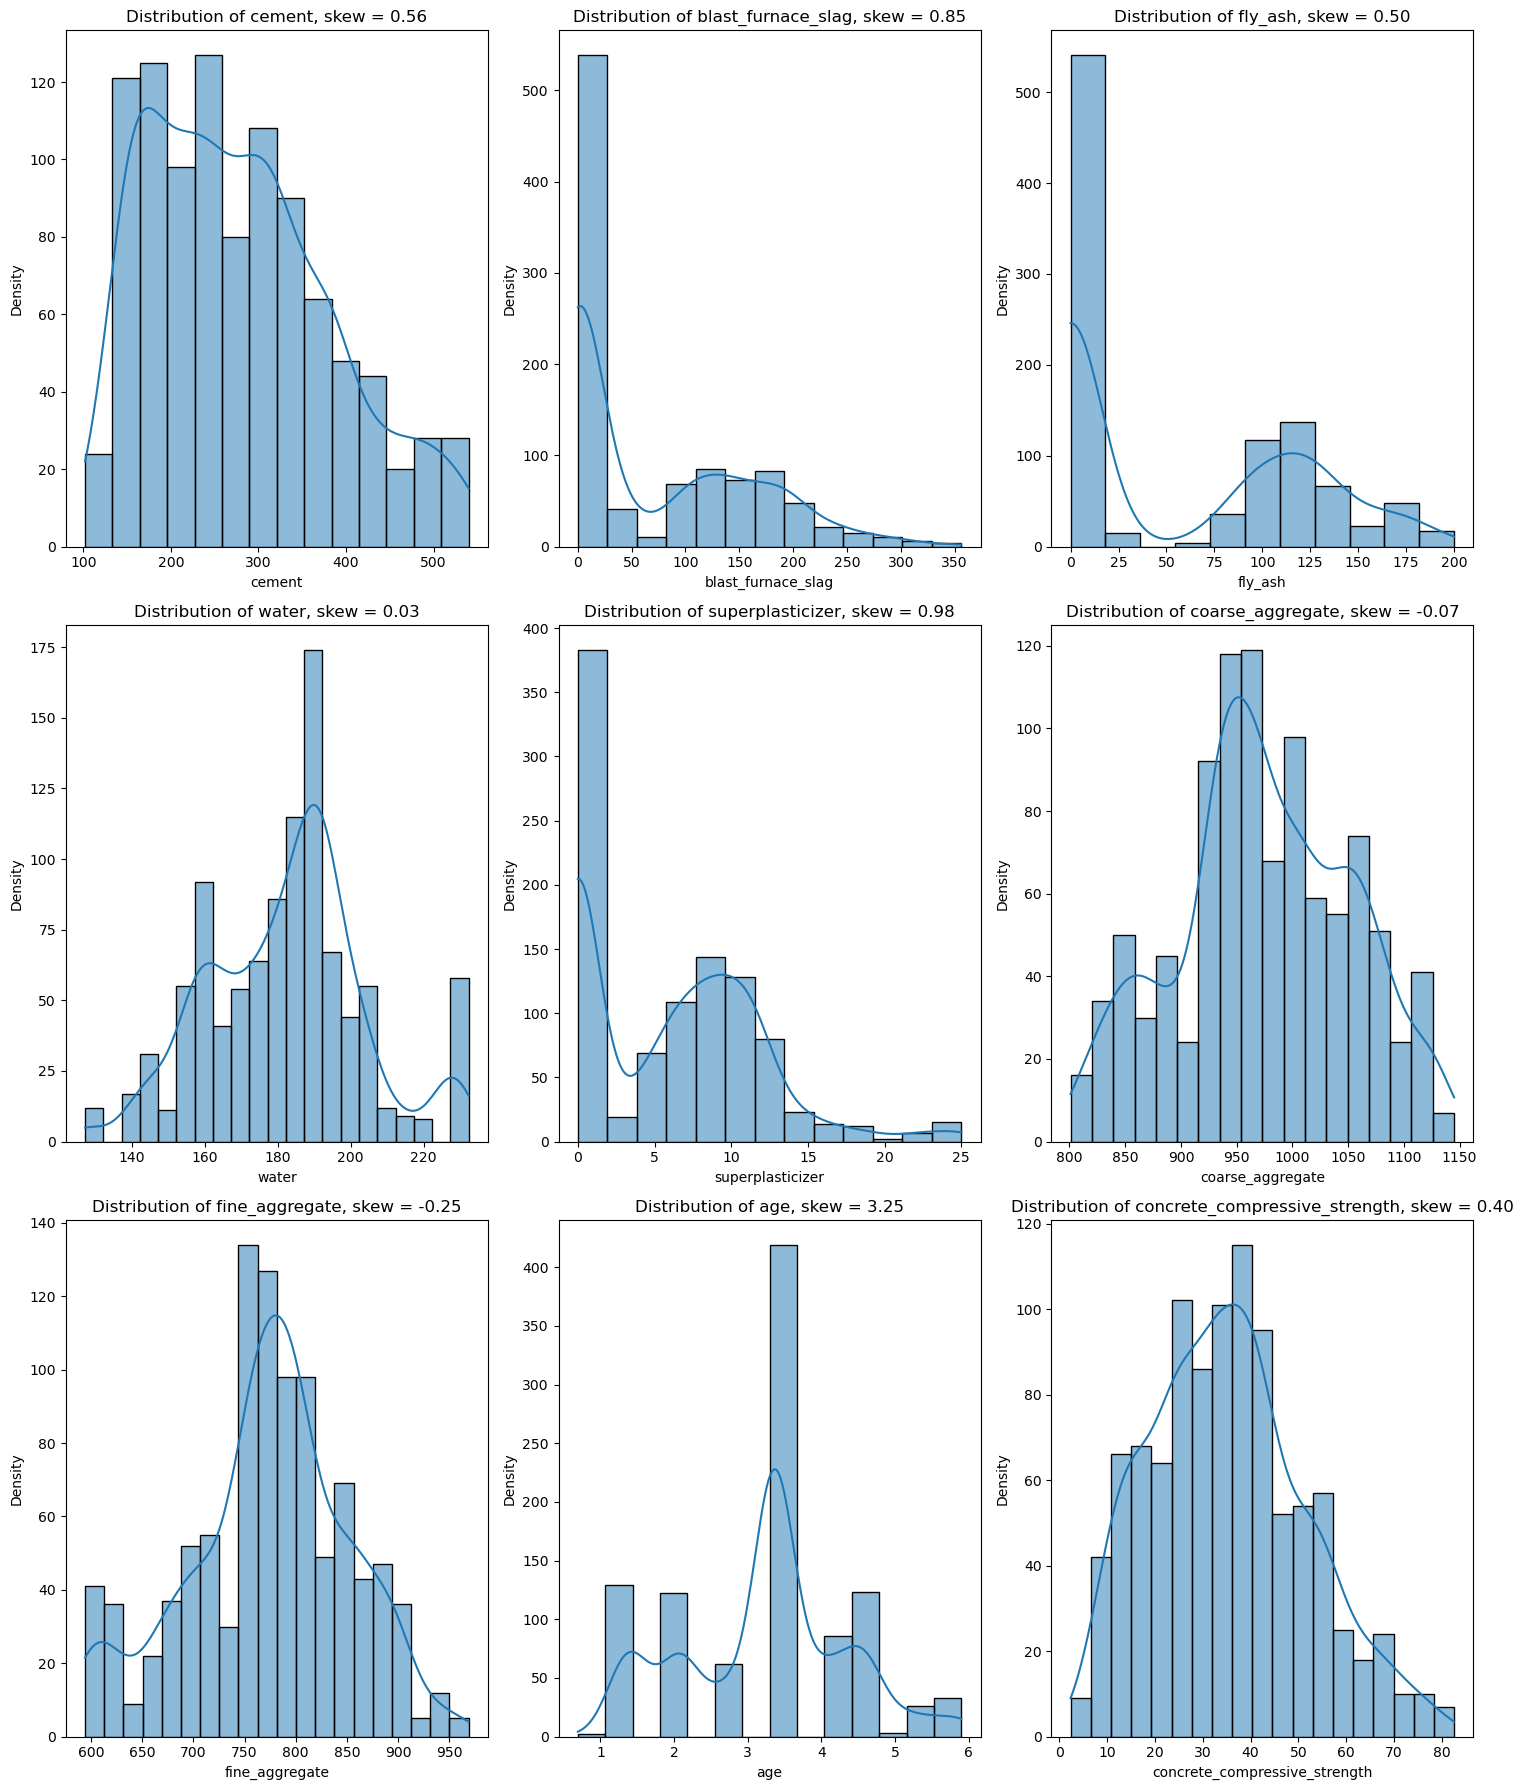

In [15]:

features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

num_plots = len(features)
num_rows = num_plots // 3 + num_plots % 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(df_win[feature], kde=True, ax=ax)
    skewness = stats.skew(df[feature])
    ax.set_title(f"Distribution of {feature}, skew = {skewness:.2f}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

# Remove any unused subplots
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()

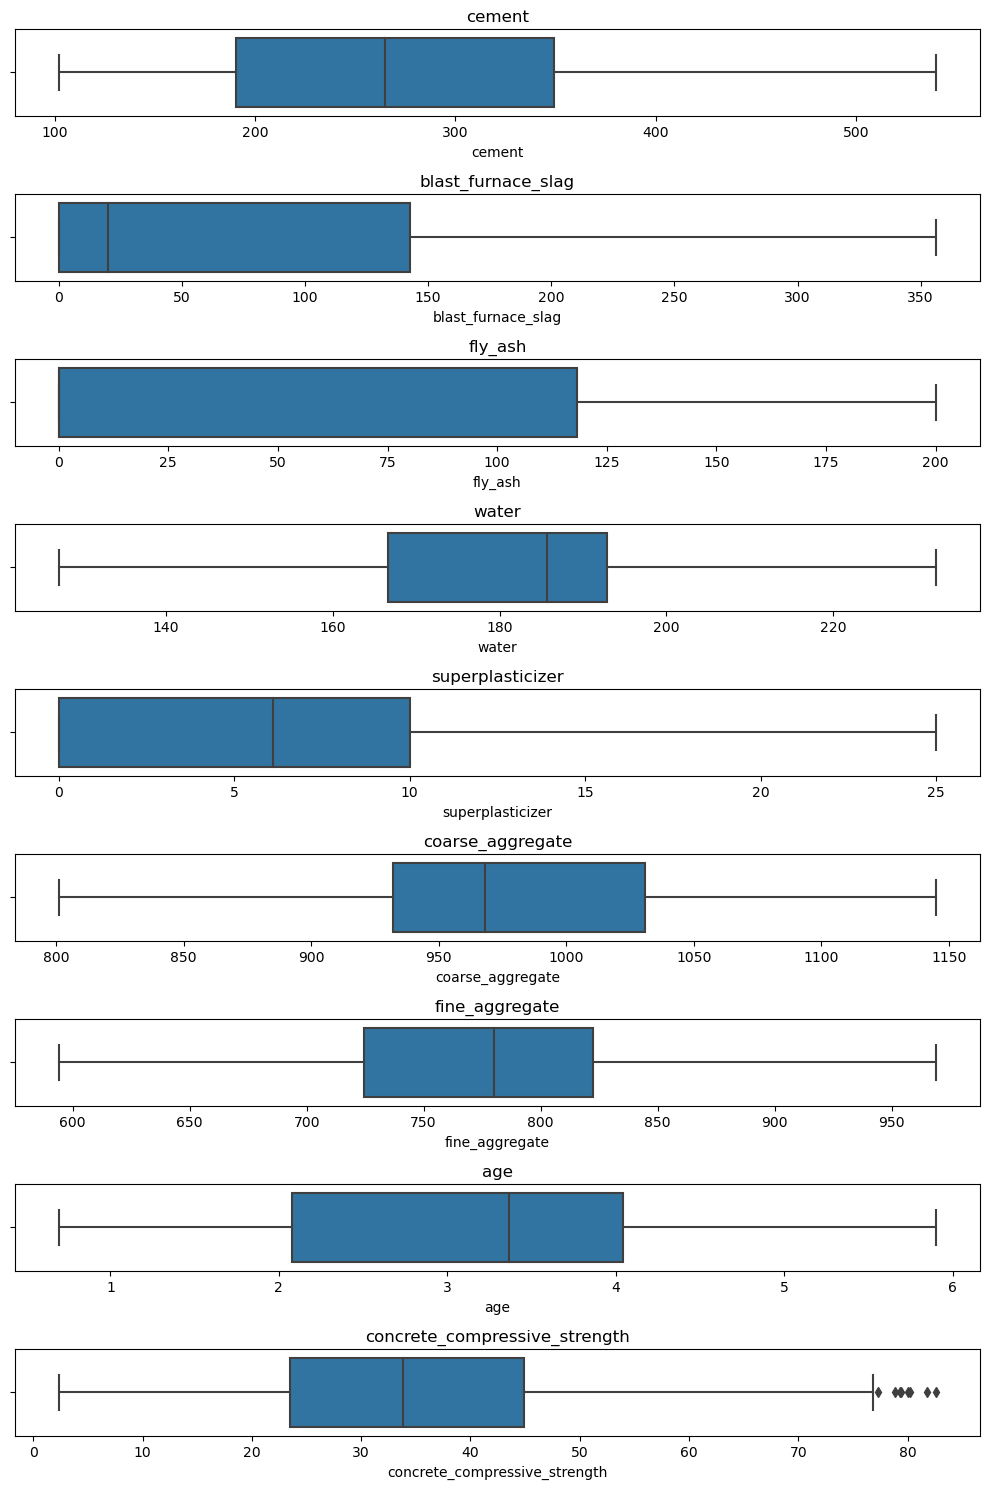

In [16]:
# Set the size of the figure
plt.figure(figsize=(10, 15))

# For each feature, create a subplot and draw a boxplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df_win[feature])
    plt.title(feature)

# Display the plot
plt.tight_layout()
plt.show()

Null Hypothesis (H0): The hypothesis that there is no significant difference or effect. In statistics, we usually assume the null hypothesis is true until we have enough evidence to reject it.

Alternative Hypothesis (Ha or H1): The hypothesis that there is a significant difference or effect. This is the hypothesis we are testing for, and it's considered as an alternative to the null hypothesis.

In the context of the Shapiro-Wilk test:

H0: "The data is drawn from a normal distribution."

Ha: "The data is not drawn from a normal distribution."

We use statistical tests to determine whether to reject the null hypothesis in favor of the alternative hypothesis. If the p-value is less than a chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that the data is not normally distributed.

Feature: cement
Test statistic = 0.9552807807922363
p-value = 6.013706285400958e-17
Data does not appear to be normally distributed.

Feature: blast_furnace_slag
Test statistic = 0.8046630620956421
p-value = 3.90569973409404e-33
Data does not appear to be normally distributed.

Feature: fly_ash
Test statistic = 0.7687335014343262
p-value = 2.3511827041302088e-35
Data does not appear to be normally distributed.

Feature: water
Test statistic = 0.9775084853172302
p-value = 2.3437933885372964e-11
Data does not appear to be normally distributed.

Feature: superplasticizer
Test statistic = 0.8710330724716187
p-value = 5.37856718536708e-28
Data does not appear to be normally distributed.

Feature: coarse_aggregate
Test statistic = 0.9833500385284424
p-value = 2.6790256679731783e-09
Data does not appear to be normally distributed.

Feature: fine_aggregate
Test statistic = 0.9799327850341797
p-value = 1.5071552339485095e-10
Data does not appear to be normally distributed.

Feature: age
Test st

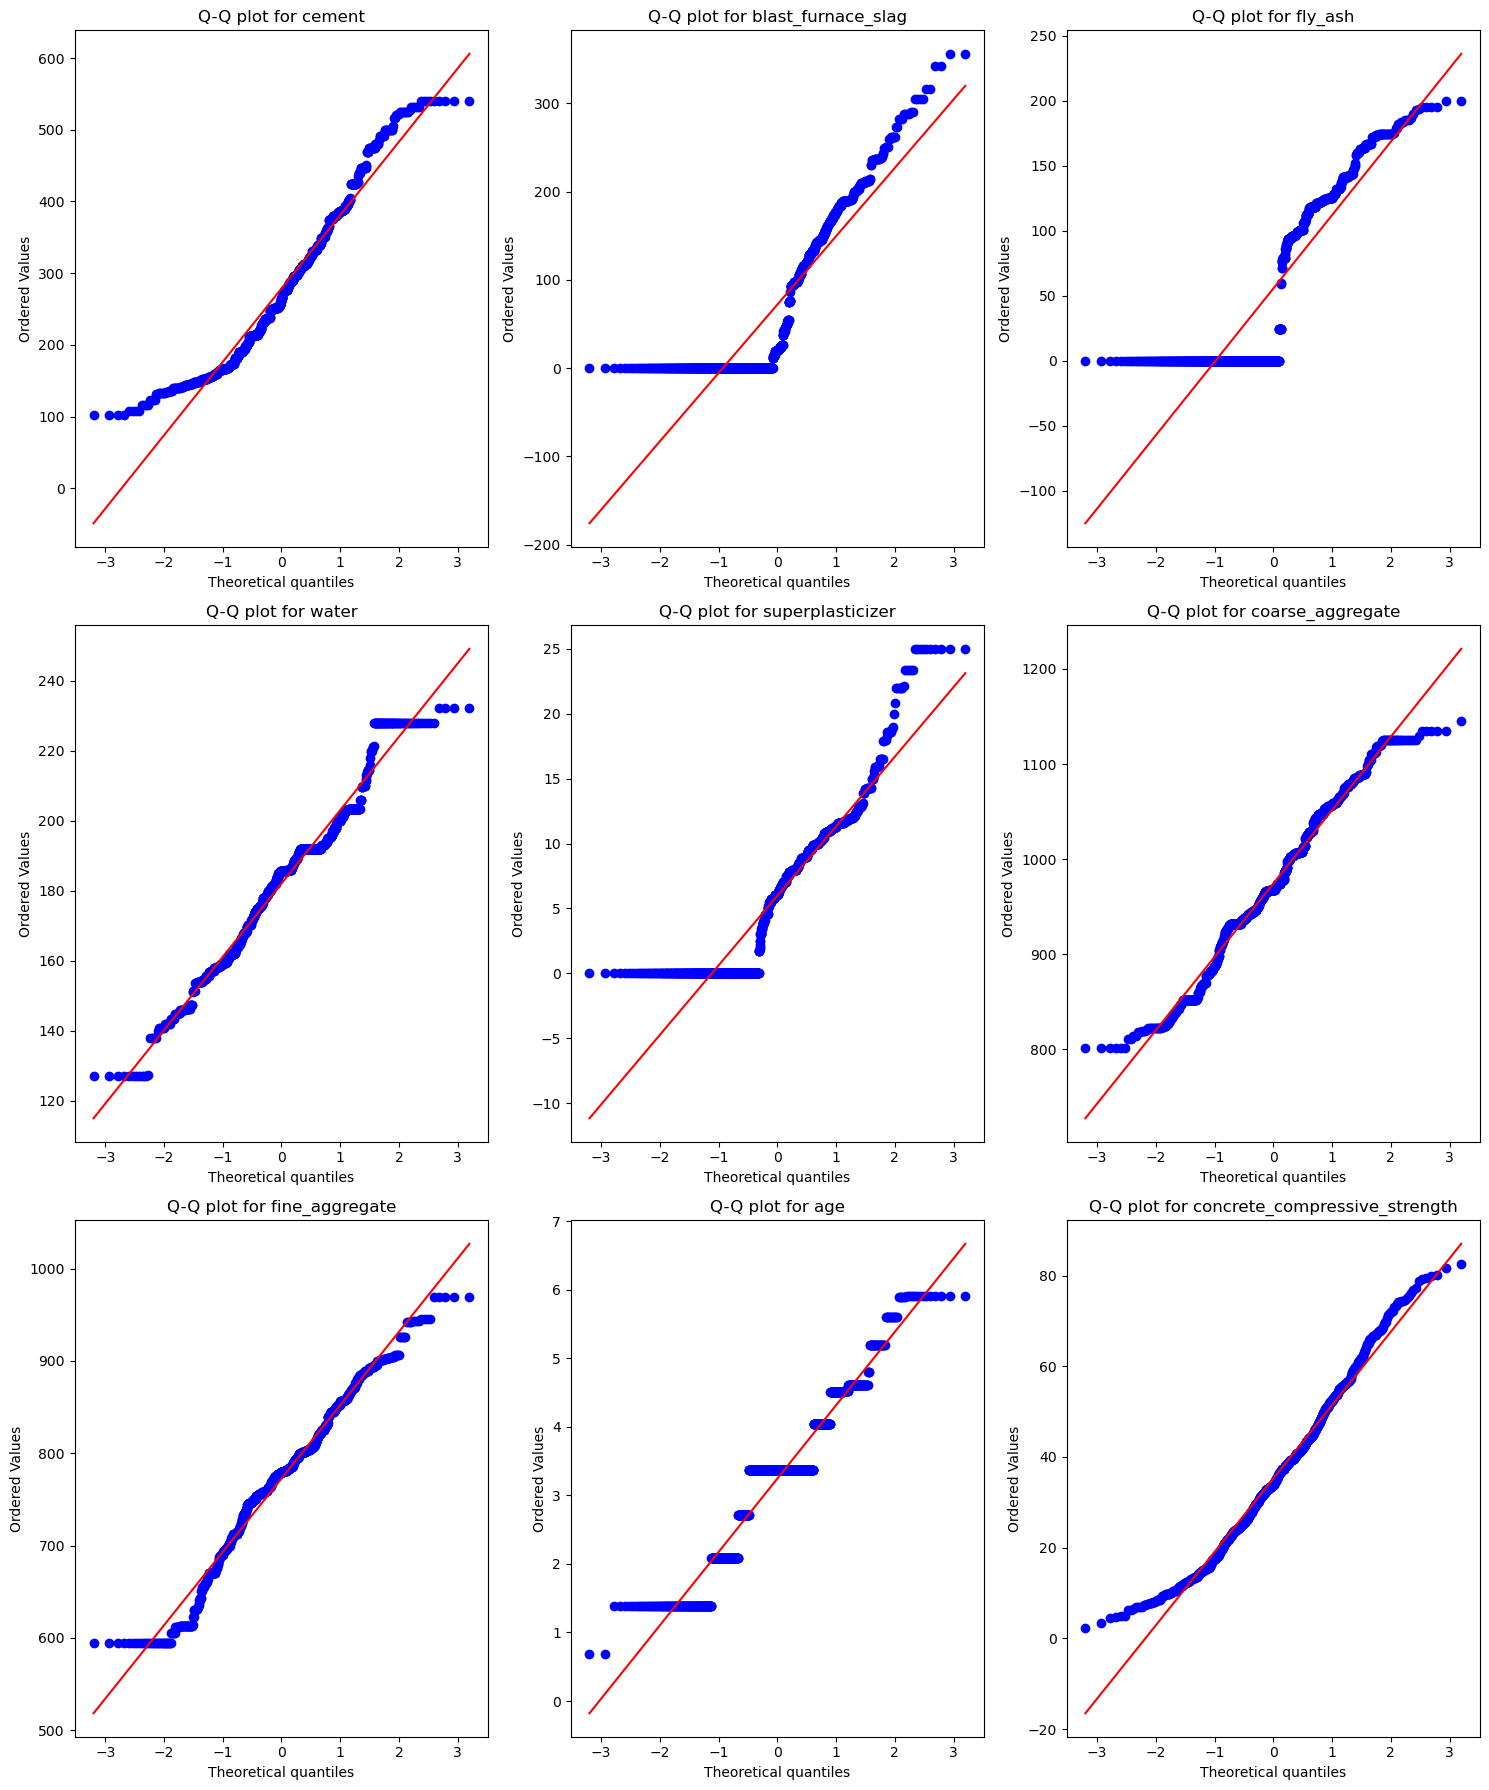

In [17]:
features = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 
            'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

num_plots = len(features)
num_rows = num_plots // 3 + num_plots % 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6 * num_rows))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    data = df_win[feature]
    
    # perform Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    
    # print test statistic and p-value
    print(f'Feature: {feature}')
    print('Test statistic =', stat)
    print('p-value =', p)
    
    if p > 0.05:
        print('Data appears to be normally distributed.\n')
    else:
        print('Data does not appear to be normally distributed.\n')
    
    # generate Q-Q plot in subplot
    stats.probplot(data, plot=ax)
    ax.set_title('Q-Q plot for ' + feature)

# Remove any unused subplots
if num_plots % 3 != 0:
    for j in range(num_plots % 3, 3):
        fig.delaxes(axes[num_rows - 1, j])

plt.tight_layout()
plt.show()


Model devlopment with out any box cox 

Apply standard scaling after the train-test split to avoid data leakage and ensure a fair evaluation of the model's performance. Scaling before the split could introduce information from the test set into the training set, leading to overly optimistic results. Separating scaling ensures that the scaling process is based solely on the training data, preserving the integrity of the evaluation on unseen test data.

In [18]:
# train test split

X = df_win.drop(['concrete_compressive_strength'], axis=1)
y = df_win['concrete_compressive_strength']

# feature scaling 
# standardization z score transformation

"""from sklearn.preprocessing import StandardScaler

#create a standaescalar object
scaler = StandardScaler()

# fit the scaler on the training data and transform
X = scaler.fit_transform(X)"""


# train test split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (804, 8)
y_train shape: (804,)
X_test shape: (201, 8)
y_test shape: (201,)


In [19]:
"""# feature scaling 
# standardization z score transformation

from sklearn.preprocessing import StandardScaler

#create a standaescalar object
scaler = StandardScaler()

# fit the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)"""

'# feature scaling \n# standardization z score transformation\n\nfrom sklearn.preprocessing import StandardScaler\n\n#create a standaescalar object\nscaler = StandardScaler()\n\n# fit the scaler on the training data and transform\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)'

# Linear Models

In [20]:
# Create a LinearRegression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the training and test sets
linear_ypred_train = linear_model.predict(X_train)
linear_ypred_test = linear_model.predict(X_test)

# Calculate the RMSE and R2 score for the test set
linear_rmse_test = mean_squared_error(y_test, linear_ypred_test, squared=False)
linear_r2_test = r2_score(y_test, linear_ypred_test)
linear_r2_train = r2_score(y_train, linear_ypred_train)
# Perform k-fold cross-validation
k = 5
kfold_linear = KFold(n_splits=k, random_state=42, shuffle=True)
cv_linear = cross_val_score(linear_model, X, y, cv=kfold_linear, scoring='r2')

# Print the results
print("Linear Regression (Train) - R^2:", linear_r2_train)
print("Linear Regression (Test) - R^2:", linear_r2_test)
print("Linear Regression (Test) - RMSE:", linear_rmse_test)
print("Linear Regression CV Score Mean (R^2):", cv_linear.mean())

Linear Regression (Train) - R^2: 0.8118386314679358
Linear Regression (Test) - R^2: 0.8018787269480201
Linear Regression (Test) - RMSE: 7.687945558917106
Linear Regression CV Score Mean (R^2): 0.8062835165349884


In [21]:
# L1 (Lasso) Regression

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_ypred_train = lasso_model.predict(X_train)
lasso_ypred_test = lasso_model.predict(X_test)
lasso_r2_train = r2_score(y_train, lasso_ypred_train)
lasso_r2_test = r2_score(y_test, lasso_ypred_test)
lasso_coeffs = lasso_model.coef_

print("Lasso Regression (Train) - R^2:", lasso_r2_train)
print("Lasso Regression (Test) - R^2:", lasso_r2_test)
print("Lasso Coeffecients : ", lasso_coeffs)


# L2 (Ridge) Regression
ridge_model = Ridge(alpha=0.1)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
ridge_predictions_train = ridge_model.predict(X_train)
ridge_predictions_test = ridge_model.predict(X_test)
ridge_rmse_test = mean_squared_error(y_test, ridge_predictions_test, squared=False)
ridge_r2_train = r2_score(y_train, ridge_predictions_train)
ridge_r2_test = r2_score(y_test, ridge_predictions_test)

# Elastic Net Regression
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_model.fit(X_train, y_train)
elastic_predictions_train = elastic_model.predict(X_train)
elastic_predictions_test = elastic_model.predict(X_test)
elastic_rmse_test = mean_squared_error(y_test, elastic_predictions_test, squared=False)
elastic_r2_train = r2_score(y_train, elastic_predictions_train)
elastic_r2_test = r2_score(y_test, elastic_predictions_test)



print("Ridge Regression (Train) - R^2:", ridge_r2_train)
print("Ridge Regression (Test) - R^2:", ridge_r2_test)
print("Ridge Regression (Test) - RMSE:", ridge_rmse_test)
print("Elastic Net Regression (Train) - R^2:", elastic_r2_train)
print("Elastic Net Regression (Test) - R^2:", elastic_r2_test)
print("Elastic Net Regression (Test) - RMSE:", elastic_rmse_test)

Lasso Regression (Train) - R^2: 0.8118018392110645
Lasso Regression (Test) - R^2: 0.801306711102141
Lasso Coeffecients :  [ 0.128684    0.1079348   0.08926864 -0.12961026  0.14277453  0.02494076
  0.03156957  9.01662573]
Ridge Regression (Train) - R^2: 0.8118386270317498
Ridge Regression (Test) - R^2: 0.8018727539625294
Ridge Regression (Test) - RMSE: 7.6880614466268735
Elastic Net Regression (Train) - R^2: 0.8110292368698964
Elastic Net Regression (Test) - R^2: 0.7985088125089579
Elastic Net Regression (Test) - RMSE: 7.753053351420581


In [22]:
# Polynomial Regression
degree = 3  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

poly_predictions_train = poly_model.predict(X_train_poly)  # Generate predictions on the training dataset
poly_predictions = poly_model.predict(X_test_poly)

poly_rmse = mean_squared_error(y_test, poly_predictions, squared=False)
poly_r2_test = r2_score(y_test, poly_predictions)
poly_r2_train = r2_score(y_train, poly_predictions_train)  # Compute R^2 score on the training dataset


# K Fold Cross Validation

X_poly = poly_features.fit_transform(X)

k = 5 
kfold_ploy = KFold(n_splits=k, random_state= 42, shuffle=True)
CV_score_poly = cross_val_score(poly_model,X_poly,y, scoring='r2', cv=kfold_ploy)



# Print the evaluation metrics
print("Polynomial Regression (Degree", degree, ") - RMSE:", poly_rmse)
print("Polynomial Regression (Degree", degree, ") - Train - R^2:", poly_r2_train)
print("Polynomial Regression (Degree", degree, ") - Test - R^2:", poly_r2_test)
print("CV_Score : ",CV_score_poly.mean())

Polynomial Regression (Degree 3 ) - RMSE: 5.28301511988899
Polynomial Regression (Degree 3 ) - Train - R^2: 0.9486183536195091
Polynomial Regression (Degree 3 ) - Test - R^2: 0.9064434456291715
CV_Score :  0.893688121341113


In [23]:
degree = 3

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create Lasso regression model with L1 regularization
lasso_model = Lasso(alpha=0.1, max_iter=1000)  # Adjust the alpha and max_iter values as needed
lasso_model.fit(X_train_poly, y_train)
lasso_predictions = lasso_model.predict(X_test_poly)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Create Ridge regression model with L2 regularization
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha value as needed
ridge_model.fit(X_train_poly, y_train)
ridge_predictions = ridge_model.predict(X_test_poly)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Perform k-fold cross-validation with Lasso and Ridge models
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

lasso_cv_scores = cross_val_score(lasso_model, X_train_poly, y_train, scoring='r2', cv=kfold)
ridge_cv_scores = cross_val_score(ridge_model, X_train_poly, y_train, scoring='r2', cv=kfold)

# Print the evaluation metrics
print("Polynomial Regression (Degree", degree, ") - RMSE (Lasso):", lasso_rmse)
print("Polynomial Regression (Degree", degree, ") - R^2 (Lasso):", lasso_r2)
print("Polynomial Regression (Degree", degree, ") - RMSE (Ridge):", ridge_rmse)
print("Polynomial Regression (Degree", degree, ") - R^2 (Ridge):", ridge_r2)
print("Lasso Regression CV Score:", lasso_cv_scores.mean())
print("Ridge Regression CV Score:", ridge_cv_scores.mean())


c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.854e+03, tolerance: 2.062e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.02343e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.037e+03, tolerance: 1.684e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_

Polynomial Regression (Degree 3 ) - RMSE (Lasso): 5.668570347781384
Polynomial Regression (Degree 3 ) - R^2 (Lasso): 0.8922896114117612
Polynomial Regression (Degree 3 ) - RMSE (Ridge): 5.542469174748835
Polynomial Regression (Degree 3 ) - R^2 (Ridge): 0.8970284893392847
Lasso Regression CV Score: 0.8858051904918037
Ridge Regression CV Score: 0.8637204203477339


c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.326e+03, tolerance: 1.657e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.078e+03, tolerance: 1.602e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\navee\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.622e+03, toleranc

In [24]:
#XG boost

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)



# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# Calculate metrics
xgb_rmse_test = mean_squared_error(y_test, xgb_ypred_test, squared=False)
xgb_r2_train = r2_score(y_train, xgb_ypred_train)
xgb_r2_test = r2_score(y_test, xgb_ypred_test)

# Perform  k fold cross-validation on XGBoost Regression
k = 5 
kfold_XG = KFold(n_splits=k, random_state= 42, shuffle=True)
CV_score_XG = cross_val_score(xgb_model,X,y, scoring='r2', cv=kfold_XG)



print("XGBoost Regression (Train) - R^2:", xgb_r2_train)
print("XGBoost Regression (Test) - R^2:", xgb_r2_test)
print("XGBoost Regression (Test) - RMSE:", xgb_rmse_test)
print("XGBoost Regression CV Score :", CV_score_XG.mean())

XGBoost Regression (Train) - R^2: 0.995463072105782
XGBoost Regression (Test) - R^2: 0.9407232833443256
XGBoost Regression (Test) - RMSE: 4.205201535481799
XGBoost Regression CV Score : 0.9321792412227955


In [25]:
""" #Hyperparamater tuning
#Grid serch 

from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'lambda': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'n_estimators': [200,250],
    'max_depth': [2, 4, 6]
}

# Initialize an XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_) """


" #Hyperparamater tuning\n#Grid serch \n\nfrom sklearn.model_selection import GridSearchCV\n\n# Define a parameter grid\nparam_grid = {\n    'alpha': [0.001, 0.01, 0.1, 1, 10],\n    'lambda': [0.001, 0.01, 0.1, 1, 10],\n    'gamma': [0.001, 0.01, 0.1, 1, 10],\n    'n_estimators': [200,250],\n    'max_depth': [2, 4, 6]\n}\n\n# Initialize an XGBoost Regressor\nxgb_model = xgb.XGBRegressor(objective='reg:squarederror')\n\n# Initialize the GridSearchCV object\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Fit the GridSearchCV object to the data\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters\nprint(grid_search.best_params_) "

In [26]:
""" #Hyperparamater tuning
#random serch 


from sklearn.model_selection import RandomizedSearchCV

# Initialize the RandomizedSearchCV object
rand_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, n_iter=50, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the data
rand_search.fit(X_train, y_train)

# Print the best parameters
print(rand_search.best_params_) """


' #Hyperparamater tuning\n#random serch \n\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Initialize the RandomizedSearchCV object\nrand_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, n_iter=50, n_jobs=-1, verbose=2)\n\n# Fit the RandomizedSearchCV object to the data\nrand_search.fit(X_train, y_train)\n\n# Print the best parameters\nprint(rand_search.best_params_) '

In [27]:
# remodeling according to Gridsearch CV 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, reg_alpha=1, reg_lambda=10, gamma=0.01, max_depth=4)



# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# Calculate metrics
xgb_rmse_test = mean_squared_error(y_test, xgb_ypred_test, squared=False)
xgb_r2_train_remodel_grid = r2_score(y_train, xgb_ypred_train)
xgb_r2_test_remodel_grid = r2_score(y_test, xgb_ypred_test)

# Perform cross-validation on XGBoost Regression
k = 5 
kfold_XG_remodel_grid = KFold(n_splits=k, random_state= 42, shuffle=True)
CV_score_XG_remodel_grid = cross_val_score(xgb_model,X,y, scoring='r2', cv=kfold_XG_remodel_grid)


print("XGBoost Regression (Train) - R^2:", xgb_r2_train_remodel_grid)
print("XGBoost Regression (Test) - R^2:", xgb_r2_test_remodel_grid)
print("XGBoost Regression (Test) - RMSE:", xgb_rmse_test)
print("XGBoost Regression CV Score :", CV_score_XG_remodel_grid.mean())

XGBoost Regression (Train) - R^2: 0.9809902328100953
XGBoost Regression (Test) - R^2: 0.9288773110602735
XGBoost Regression (Test) - RMSE: 4.606264031537432
XGBoost Regression CV Score : 0.927142787403106


In [28]:
# remodeling according to randomsearch CV


xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, reg_alpha=0.1, reg_lambda=10, gamma=0.01, max_depth=4)



# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# Calculate metrics
xgb_rmse_test = mean_squared_error(y_test, xgb_ypred_test, squared=False)
xgb_r2_train_remodel_random = r2_score(y_train, xgb_ypred_train)
xgb_r2_test_remodel_random = r2_score(y_test, xgb_ypred_test)

# Perform cross-validation on XGBoost Regression
k = 5 
kfold_XG_remodel_random = KFold(n_splits=k, random_state= 42, shuffle=True)
CV_score_XG_remodel_random = cross_val_score(xgb_model,X,y, scoring='r2', cv=kfold_XG_remodel_random)


print("XGBoost Regression (Train) - R^2:", xgb_r2_train_remodel_random)
print("XGBoost Regression (Test) - R^2:", xgb_r2_test_remodel_random)
print("XGBoost Regression (Test) - RMSE:", xgb_rmse_test)
print("XGBoost Regression CV Score :", CV_score_XG_remodel_random.mean())

XGBoost Regression (Train) - R^2: 0.9795541846073044
XGBoost Regression (Test) - R^2: 0.9327295260441943
XGBoost Regression (Test) - RMSE: 4.479783110633898
XGBoost Regression CV Score : 0.9281559639453608


In [29]:
#Gradientboost Adaboost SVR models 

# Create a list of tuples. Each tuple contains a string label, and a model.
models = [
    ("Gradient Boosting Regressor", GradientBoostingRegressor(random_state=0)),
    ("AdaBoost Regressor", AdaBoostRegressor(random_state=0)),
    ("Support Vector Regression", SVR())
]

k = 5  # number of folds in cross-validation
kfold = KFold(n_splits=k, random_state=42, shuffle=True)

# For each model, fit the model, make predictions, compute metrics, and perform cross-validation.
for name, model in models:
    model.fit(X_train, y_train)
    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, ypred_test, squared=False)
    r2_test = r2_score(y_test, ypred_test)
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    
    print(f"{name} (Train) - R^2: {r2_score(y_train, ypred_train)}")
    print(f"{name} (Test) - R^2: {r2_test}")
    print(f"{name} (Test) - RMSE: {rmse_test}")
    print(f"{name} CV Score Mean (R^2): {cv_result.mean()}\n")

Gradient Boosting Regressor (Train) - R^2: 0.9457614131647681
Gradient Boosting Regressor (Test) - R^2: 0.8986888782520104
Gradient Boosting Regressor (Test) - RMSE: 5.497602133103749
Gradient Boosting Regressor CV Score Mean (R^2): 0.8980331796375172

AdaBoost Regressor (Train) - R^2: 0.8134647327675095
AdaBoost Regressor (Test) - R^2: 0.7779902355144297
AdaBoost Regressor (Test) - RMSE: 8.138245418225036
AdaBoost Regressor CV Score Mean (R^2): 0.7762288282076049

Support Vector Regression (Train) - R^2: 0.21009721328126063
Support Vector Regression (Test) - R^2: 0.16719861812777248
Support Vector Regression (Test) - RMSE: 15.76215024455569
Support Vector Regression CV Score Mean (R^2): 0.19186208182860534



In [30]:
""" # good result in gradient boosting regressor 
#Hyper tuning for optimise model

# Define the parameters for exploration
param_grid = {
    'n_estimators': [100, 200,300,400,500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Instantiate a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=0)

# Create the grid search object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)

#output : {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}  """

" # good result in gradient boosting regressor \n#Hyper tuning for optimise model\n\n# Define the parameters for exploration\nparam_grid = {\n    'n_estimators': [100, 200,300,400,500],\n    'learning_rate': [0.01, 0.05, 0.1],\n    'max_depth': [3, 4, 5],\n    'min_samples_split': [2, 3, 4],\n    'min_samples_leaf': [1, 2, 3]\n}\n\n# Instantiate a Gradient Boosting Regressor\ngbr = GradientBoostingRegressor(random_state=0)\n\n# Create the grid search object\ngrid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')\n\n# Fit the grid search\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\n\nprint(best_params)\n\n#output : {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}  "

In [31]:
#remodeling

# Create a Gradient Boosting Regressor with the best parameters
gbr_best = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=500)

# Fit the model and predict
gbr_best.fit(X_train, y_train)
ypred_train_gbr = gbr_best.predict(X_train)
ypred_test_gbr = gbr_best.predict(X_test)

gbr_train_r2 = r2_score(y_train, ypred_train)
gbr_test_r2 = r2_score(y_test, ypred_test)
# Print the performance metrics
print('Train R^2 Score : ', r2_score(y_train, ypred_train))
print('Test R^2 Score : ', r2_score(y_test, ypred_test))

# Perform k-fold cross-validation
k = 5
kfold_gbr = KFold(n_splits=k, random_state=0, shuffle=True)
cv_result_gbr = cross_val_score(gbr_best, X_train, y_train, cv=kfold_gbr, scoring='r2')

# Print the results
print("Gradient Boosting Regressor CV Score Mean (R^2):", cv_result_gbr.mean())


Train R^2 Score :  0.21009721328126063
Test R^2 Score :  0.16719861812777248
Gradient Boosting Regressor CV Score Mean (R^2): 0.920480909436695


In [32]:
# SVM with different Kernals

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print("Working on ", kernel, "kernel:")
    # Create a SVR model with specified kernel
    svr_model = SVR(kernel=kernel)

    # Fit the model on the training data
    svr_model.fit(X_train, y_train)

    # Make predictions on the test sets
    svr_ypred_test = svr_model.predict(X_test)

    # Calculate the RMSE and R2 score for the test set
    svr_rmse_test = mean_squared_error(y_test, svr_ypred_test, squared=False)
    svr_r2_test = r2_score(y_test, svr_ypred_test)

    # Perform k-fold cross-validation
    k = 5
    kfold_svr = KFold(n_splits=k, random_state=42, shuffle=True)
    result_svr = cross_val_score(svr_model, X, y, cv=kfold_svr, scoring='r2')

    # Print the results
    print("Support Vector Regression (Test) - R^2:", svr_r2_test)
    print("Support Vector Regression (Test) - RMSE:", svr_rmse_test)
    print("Support Vector Regression CV Score Mean (R^2):", result_svr.mean())
    print("\n")

Working on  linear kernel:
Support Vector Regression (Test) - R^2: 0.7969260747464237
Support Vector Regression (Test) - RMSE: 7.783444374972908
Support Vector Regression CV Score Mean (R^2): 0.8050342985222219


Working on  poly kernel:
Support Vector Regression (Test) - R^2: 0.28696923863063595
Support Vector Regression (Test) - RMSE: 14.584746250426868
Support Vector Regression CV Score Mean (R^2): 0.3291831294716294


Working on  rbf kernel:
Support Vector Regression (Test) - R^2: 0.16719861812777248
Support Vector Regression (Test) - RMSE: 15.76215024455569
Support Vector Regression CV Score Mean (R^2): 0.19186208182860534


Working on  sigmoid kernel:
Support Vector Regression (Test) - R^2: 0.016411208646349595
Support Vector Regression (Test) - RMSE: 17.12976992324485
Support Vector Regression CV Score Mean (R^2): 0.019831816347592346




In [33]:
from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the training and test sets
dt_ypred_train = dt_model.predict(X_train)
dt_ypred_test = dt_model.predict(X_test)

# Calculate the RMSE and R2 score for the test set
dt_rmse_test = mean_squared_error(y_test, dt_ypred_test, squared=False)
dt_r2_test = r2_score(y_test, dt_ypred_test)
dt_r2_train = r2_score(y_train, dt_ypred_train)

# Perform k-fold cross-validation
kfold_dt = KFold(n_splits=k, random_state=42, shuffle=True)
result_dt = cross_val_score(dt_model, X, y, cv=kfold_dt, scoring='r2')

# Print the results
print("Decision Tree Regression (Train) - R^2:", r2_score(y_train, dt_ypred_train))
print("Decision Tree Regression (Test) - R^2:", dt_r2_test)
print("Decision Tree Regression (Test) - RMSE:", dt_rmse_test)
print("Decision Tree Regression CV Score Mean (R^2):", result_dt.mean())


Decision Tree Regression (Train) - R^2: 0.9963945786082596
Decision Tree Regression (Test) - R^2: 0.8758643190844433
Decision Tree Regression (Test) - RMSE: 6.08545506174006
Decision Tree Regression CV Score Mean (R^2): 0.8605869561001931


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42,n_estimators=100)
    
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
rf_ypred_train = rf_model.predict(X_train)
rf_ypred_test = rf_model.predict(X_test)

# Calculate the RMSE and R2 score for the test set
rf_rmse_test = mean_squared_error(y_test, rf_ypred_test, squared=False)
rf_r2_test = r2_score(y_test, rf_ypred_test)
rf_r2_train = r2_score(y_train, rf_ypred_train)
# Perform k-fold cross-validation
kfold_rf = KFold(n_splits=k, random_state=42, shuffle=True)
result_rf = cross_val_score(rf_model, X, y, cv=kfold_rf, scoring='r2')

# Print the results
print("Random Forest Regression (Train) - R^2:", r2_score(y_train, rf_ypred_train))
print("Random Forest Regression (Test) - R^2:", rf_r2_test)
print("Random Forest Regression (Test) - RMSE:", rf_rmse_test)
print("Random Forest Regression CV Score Mean (R^2):", result_rf.mean())


Random Forest Regression (Train) - R^2: 0.9836023034088139
Random Forest Regression (Test) - R^2: 0.9078481601448525
Random Forest Regression (Test) - RMSE: 5.243203930243555
Random Forest Regression CV Score Mean (R^2): 0.9078616801233419


In [35]:
"""# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   scoring='neg_mean_squared_error', cv=5, n_iter=20, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters: ", best_params)"""


'# Define the parameter grid\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# Create a RandomForestRegressor model\nrf_model = RandomForestRegressor(random_state=42)\n\n# Create a RandomizedSearchCV object\nrandom_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, \n                                   scoring=\'neg_mean_squared_error\', cv=5, n_iter=20, \n                                   verbose=2, random_state=42, n_jobs=-1)\n\n# Fit the RandomizedSearchCV object to the data\nrandom_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = random_search.best_params_\nprint("Best parameters: ", best_params)'

In [36]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=122,n_estimators=200,min_samples_split=5,
                                min_samples_leaf=2, max_depth=30 )
    
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets
rf_ypred_train = rf_model.predict(X_train)
rf_ypred_test = rf_model.predict(X_test)

# Calculate the RMSE and R2 score for the test set
rf_rmse_test = mean_squared_error(y_test, rf_ypred_test, squared=False)
rf_r2_test = r2_score(y_test, rf_ypred_test)
rf_r2_train = r2_score(y_train, rf_ypred_train)

# Perform k-fold cross-validation
kfold_rf = KFold(n_splits=k, random_state=42, shuffle=True)
result_rf = cross_val_score(rf_model, X, y, cv=kfold_rf, scoring='r2')

# Print the results
print("Random Forest Regression (Train) - R^2:", r2_score(y_train, rf_ypred_train))
print("Random Forest Regression (Test) - R^2:", rf_r2_test)
print("Random Forest Regression (Test) - RMSE:", rf_rmse_test)
print("Random Forest Regression CV Score Mean (R^2):", result_rf.mean())

Random Forest Regression (Train) - R^2: 0.9687902248650719
Random Forest Regression (Test) - R^2: 0.8980750697784449
Random Forest Regression (Test) - RMSE: 5.514231003416357
Random Forest Regression CV Score Mean (R^2): 0.8998799887175905


In [37]:
# Initialize the data
data = {
    'Model': ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 'Polynomial', 'XGBoost', 'Gradient Boost', 'Decision Tree', 'Random Forest'],
    'Train R^2': [linear_r2_train, lasso_r2_train, ridge_r2_train, elastic_r2_train, poly_r2_train, xgb_r2_train, gbr_train_r2, dt_r2_train, rf_r2_train],
    'Test R^2': [linear_r2_test, lasso_r2_test, ridge_r2_test, elastic_r2_test, poly_r2_test, xgb_r2_test, gbr_test_r2, dt_r2_test, rf_r2_test],
    'CV Score': [cv_linear.mean(), None, None, None, CV_score_poly.mean(), CV_score_XG.mean(), cv_result_gbr.mean(), result_dt.mean(), result_rf.mean()]
}

# Create the DataFrame
model3_df = pd.DataFrame(data)

# Print the DataFrame
model3_df.head(10)

,Model,Train R^2,Test R^2,CV Score
0,Linear,0.811839,0.801879,0.806284
1,Lasso,0.811802,0.801307,NaN
2,Ridge,0.811839,0.801873,NaN
3,ElasticNet,0.811029,0.798509,NaN
4,Polynomial,0.948618,0.906443,0.893688
5,XGBoost,0.995463,0.940723,0.932179
6,Gradient Boost,0.210097,0.167199,0.920481
7,Decision Tree,0.996395,0.875864,0.860587
8,Random Forest,0.968790,0.898075,0.899880


In [38]:
# Add AdaBoost Regressor and Support Vector Regression results
additional_data = {
    'Model': ['AdaBoost Regressor', 'Support Vector Regression'],
    'Train R^2': [0.8133125834162438, 0.6519593302248241],
    'Test R^2': [0.7848271077338245, 0.5964097209757289],
    'CV Score': [0.7782365779321035, 0.6226806238391634]
}

additional_df = pd.DataFrame(additional_data)

# Append the new data to the existing dataframe
model3_df = model3_df.append(additional_df, ignore_index=True)

print(model3_df)


                        Model  Train R^2  Test R^2  CV Score
0                      Linear   0.811839  0.801879  0.806284
1                       Lasso   0.811802  0.801307       NaN
2                       Ridge   0.811839  0.801873       NaN
3                  ElasticNet   0.811029  0.798509       NaN
4                  Polynomial   0.948618  0.906443  0.893688
5                     XGBoost   0.995463  0.940723  0.932179
6              Gradient Boost   0.210097  0.167199  0.920481
7               Decision Tree   0.996395  0.875864  0.860587
8               Random Forest   0.968790  0.898075  0.899880
9          AdaBoost Regressor   0.813313  0.784827  0.778237
10  Support Vector Regression   0.651959  0.596410  0.622681


C:\Users\navee\AppData\Local\Temp\ipykernel_8144\1461840159.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model3_df = model3_df.append(additional_df, ignore_index=True)


In [39]:
# Add the Support Vector Regression results with different kernels
additional_svr_data = {
    'Model': ['Support Vector Regression (linear kernel)', 'Support Vector Regression (poly kernel)', 
              'Support Vector Regression (rbf kernel)', 'Support Vector Regression (sigmoid kernel)'],
    'Train R^2': [None, None, None, None],  # replace 'None' with actual values if available
    'Test R^2': [0.5524722274272283, 0.4838385281136649, 0.5964097209757289, 0.22592271616821202],
    'CV Score': [0.5686362836278234, 0.4971297857137946, 0.6226806238391634, 0.2621091891903883]
}

additional_svr_df = pd.DataFrame(additional_svr_data)

# Append the new data to the existing dataframe
model3_df = model3_df.append(additional_svr_df, ignore_index=True)

model3_df.head(20)


C:\Users\navee\AppData\Local\Temp\ipykernel_8144\2595005541.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model3_df = model3_df.append(additional_svr_df, ignore_index=True)


,Model,Train R^2,Test R^2,CV Score
0,Linear,0.811839,0.801879,0.806284
1,Lasso,0.811802,0.801307,NaN
2,Ridge,0.811839,0.801873,NaN
3,ElasticNet,0.811029,0.798509,NaN
4,Polynomial,0.948618,0.906443,0.893688
5,XGBoost,0.995463,0.940723,0.932179
6,Gradient Boost,0.210097,0.167199,0.920481
7,Decision Tree,0.996395,0.875864,0.860587
8,Random Forest,0.968790,0.898075,0.899880
9,AdaBoost Regressor,0.813313,0.784827,0.778237


final XG boost perfoming well

Further checks and tunning the model 

remodeling

In [88]:
# best parms : {'alpha': 1, 'gamma': 0.01, 'lambda': 10, 'max_depth': 4, 'n_estimators': 250}

# remodeling according to Gridsearch CV 
xgb_final_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=500, reg_alpha=1, reg_lambda=10, gamma=0.01, max_depth=3)



# Fit the model
xgb_final_model.fit(X_train, y_train)

# Make predictions
xgb_ypred_train_final = xgb_final_model.predict(X_train)
xgb_ypred_test_final = xgb_final_model.predict(X_test)

# Calculate metrics
xgb_rmse_test_final = mean_squared_error(y_test, xgb_ypred_test, squared=False)
xgb_r2_train_final = r2_score(y_train, xgb_ypred_train_final)
xgb_r2_test_final = r2_score(y_test, xgb_ypred_test_final)

# Perform cross-validation on XGBoost Regression
k = 5 
kfold_XG_final = KFold(n_splits=k, random_state= 9, shuffle=True)
CV_score_XG_final = cross_val_score(xgb_final_model,X,y, scoring='r2', cv=kfold_XG_final)


print("XGBoost Regression (Train) - R^2:", xgb_r2_train_final)
print("XGBoost Regression (Test) - R^2:", xgb_r2_test_final)
print("XGBoost Regression (Test) - RMSE:", xgb_rmse_test_final)
print("XGBoost Regression CV Score :", CV_score_XG_final.mean())

XGBoost Regression (Train) - R^2: 0.9892393635188769
XGBoost Regression (Test) - R^2: 0.9441138534680493
XGBoost Regression (Test) - RMSE: 4.195574900004231
XGBoost Regression CV Score : 0.9342862686905795


## want to check with train test valid split

In [41]:
Xcopy = df_win.drop(['concrete_compressive_strength'], axis=1)
ycopy = df_win['concrete_compressive_strength']

# Split the data into a temporary train set and a final test set
Xcopy_temp, Xcopy_test, ycopy_temp, ycopy_test = train_test_split(Xcopy, ycopy, test_size=0.2, random_state=0)

# Then split the temporary set into final train and validation sets
Xcopy_train, Xcopy_val, ycopy_train, ycopy_val = train_test_split(Xcopy_temp, ycopy_temp, test_size=0.25, random_state=42)

# Now we have training, validation, and test sets



print("Xcopy_train shape:", Xcopy_train.shape)
print("ycopy_train shape:", ycopy_train.shape)
print("Xcopy_val shape:", Xcopy_val.shape)
print("ycopy_val shape:", ycopy_val.shape)
print("Xcopy_test shape:", Xcopy_test.shape)
print("ycopy_test shape:", ycopy_test.shape)

Xcopy_train shape: (603, 8)
ycopy_train shape: (603,)
Xcopy_val shape: (201, 8)
ycopy_val shape: (201,)
Xcopy_test shape: (201, 8)
ycopy_test shape: (201,)


In [42]:
# train the data and test and valid 


# fit the model on the traing set
xgb_final_model.fit(Xcopy_train,ycopy_train)

# predication on traing set, test and valid set

ypred_train_xgb = xgb_final_model.predict(Xcopy_train)
ypred_val_xgb = xgb_final_model.predict(Xcopy_val)
ypred_test_xgb = xgb_final_model.predict(Xcopy_test)

# calculate metrics for the training, testing and vald data sets

rmse_val_xgb = mean_squared_error(ycopy_val, ypred_val_xgb, squared=False)
rmse_test_xgb = mean_squared_error(ycopy_test, ypred_test_xgb, squared=False)
r2_val_xgb = r2_score(ycopy_val, ypred_val_xgb)
r2_test_xgb = r2_score(ycopy_test, ypred_test_xgb)
r2_train_xgb = r2_score(ycopy_train, ypred_train_xgb)

#print the results

print(" Validation R2  :", r2_val_xgb)
print("Validation  RMSE : ", rmse_val_xgb)
print(" Test R2 : ", r2_test_xgb)
print("Test RMSE : ", rmse_test_xgb)
print(" Train R2 : ", r2_train_xgb)


 Validation R2  : 0.9158478761810698
Validation  RMSE :  4.7370497902188164
 Test R2 :  0.9182703378298974
Test RMSE :  4.62999646117378
 Train R2 :  0.9907831845168253


RMSE value in both above threadsole 

In [43]:
# Create a dataframe for the training set
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': xgb_ypred_train_final})

# Create a dataframe for the test set
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_ypred_test_final})


# Add a difference column
df_train['Difference'] = df_train['Actual'] - df_train['Predicted']



# Add a difference column
df_test['Difference'] = df_test['Actual'] - df_test['Predicted']

# Save df_train to a CSV file

df_train.to_csv('train_predication1.csv', index=False)

# Save df_test to a CSV file
df_test.to_csv('test_predication1.csv', index=False)
# Print the dataframes
print("Training set actual vs predicted:")
print(df_train)

print("\nTest set actual vs predicted:")
print(df_test)


Training set actual vs predicted:
     Actual  Predicted  Difference
79    41.30  40.258018    1.041982
29    38.60  37.681236    0.918764
304   23.14  23.892683   -0.752683
531   23.85  24.675049   -0.825049
676   15.75  16.758350   -1.008350
..      ...        ...         ...
115   35.10  33.272812    1.827188
294    7.40   8.380355   -0.980355
885   26.23  26.256596   -0.026596
459   55.02  55.986145   -0.966145
110   38.00  37.623489    0.376511

[804 rows x 3 columns]

Test set actual vs predicted:
     Actual  Predicted  Difference
951   19.01  19.270226   -0.260226
654   24.29  24.090265    0.199735
706   26.32  20.551338    5.768662
538   34.57  40.721363   -6.151363
389   44.13  46.694576   -2.564576
..      ...        ...         ...
232   50.77  49.660900    1.109100
802   31.65  32.528355   -0.878355
358   66.95  70.380402   -3.430402
234   13.18  16.764191   -3.584191
374   16.28  14.160086    2.119914

[201 rows x 3 columns]


Residual Plots: Residual plots can help you see if your model is making systematic errors. The residuals should be randomly scattered around the centerline. If there is a clear pattern, your model may be biased.

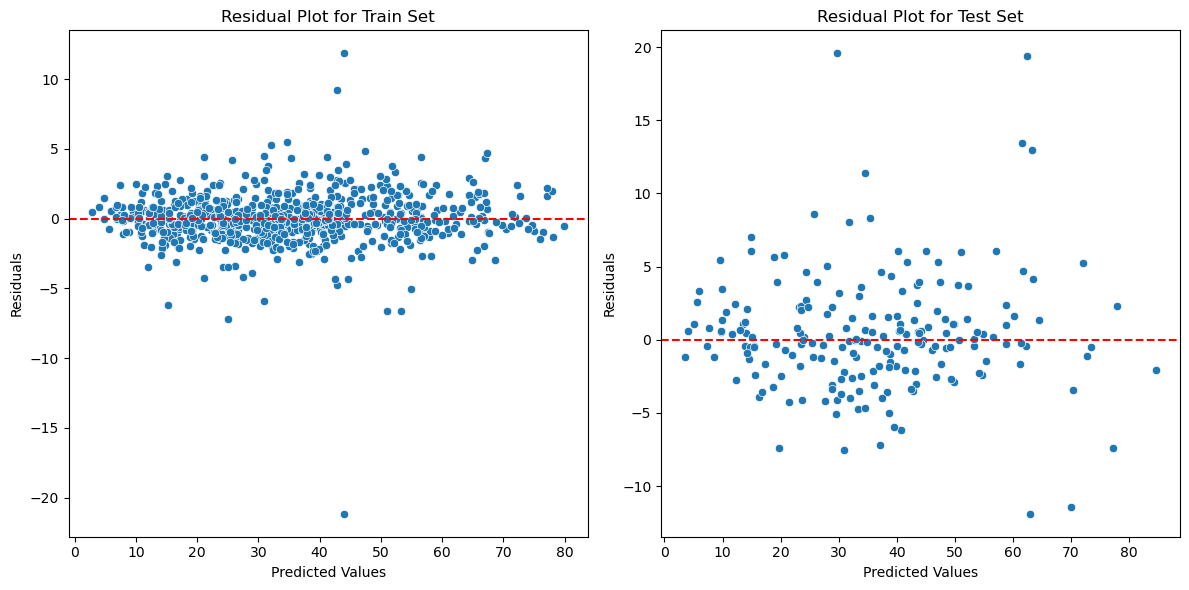

In [44]:
# Calculate residuals for the train and test sets
train_residuals = y_train - xgb_ypred_train_final
test_residuals = y_test - xgb_ypred_test_final

plt.figure(figsize=(12, 6))

# Train data residual plot
plt.subplot(121)
sns.scatterplot(x=xgb_ypred_train_final, y=train_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Test data residual plot
plt.subplot(122)
sns.scatterplot(x=xgb_ypred_test_final, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

Feature Importance: XGBoost provides a way to examine the importance of each feature in your dataset. Check this to ensure that the model makes sense — the most important features should be ones you'd expect to be predictive.

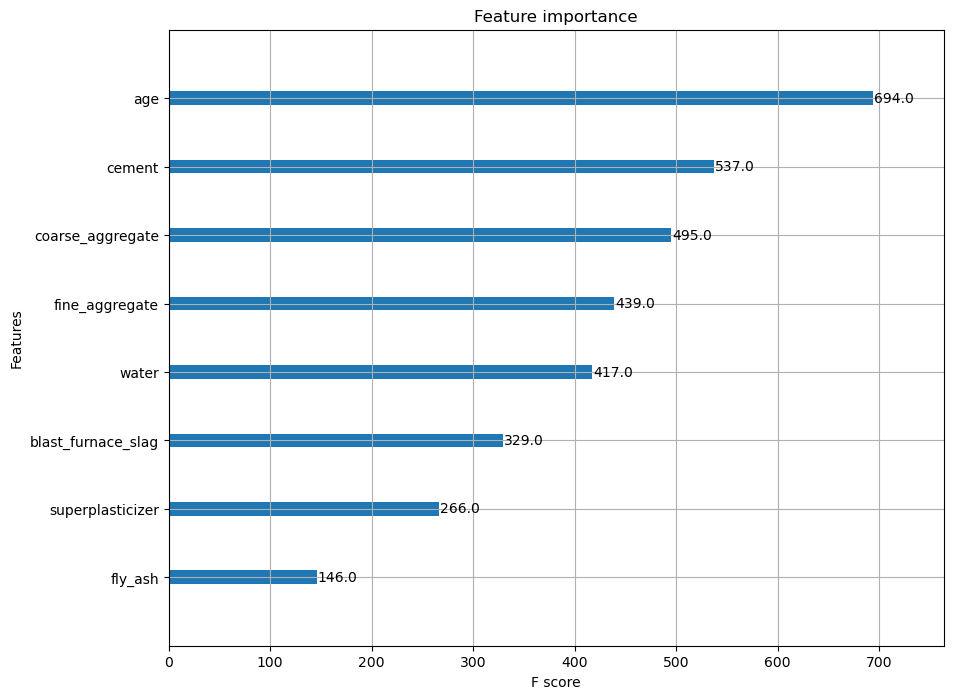

In [45]:
# Plot feature importance
from xgboost import plot_importance


fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_final_model, ax=ax)
plt.show()

Learning Curve: Learning curves can help you understand if your model could benefit from more data or if it's too complex/simple given the current amount of data.

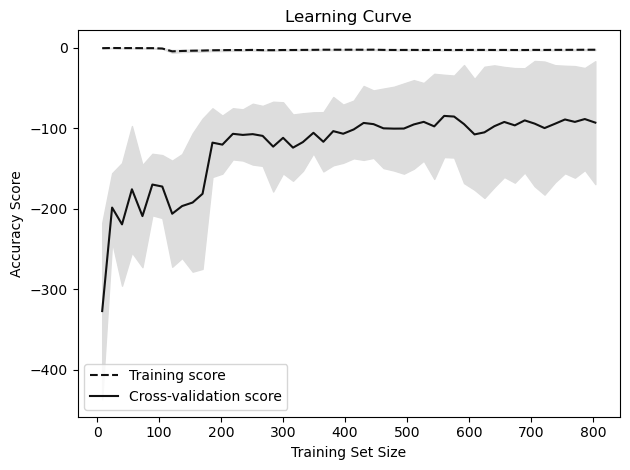

In [46]:
from sklearn.model_selection import learning_curve

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(xgb_final_model, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='neg_mean_squared_error',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


Model Robustness: You can check the robustness of your model by adding some noise to your data or removing some of the features and seeing how much the performance changes. A good model should not be overly sensitive to small changes in the data.

In [47]:


# Add Gaussian noise to your features
X_train_noisy = X_train + np.random.normal(0, 0.1, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)

# Fit the model with noisy data
xgb_final_model.fit(X_train_noisy, y_train)

# Make predictions
xgb_ypred_train_noisy = xgb_final_model.predict(X_train_noisy)
xgb_ypred_test_noisy = xgb_final_model.predict(X_test_noisy)

# Calculate metrics
xgb_rmse_test_noisy = mean_squared_error(y_test, xgb_ypred_test_noisy, squared=False)
xgb_r2_train_noisy = r2_score(y_train, xgb_ypred_train_noisy)
xgb_r2_test_noisy = r2_score(y_test, xgb_ypred_test_noisy)

print("XGBoost Regression with noise (Train) - R^2:", xgb_r2_train_noisy)
print("XGBoost Regression with noise (Test) - R^2:", xgb_r2_test_noisy)
print("XGBoost Regression with noise (Test) - RMSE:", xgb_rmse_test_noisy)


XGBoost Regression with noise (Train) - R^2: 0.9979421247990629
XGBoost Regression with noise (Test) - R^2: 0.9234976902619231
XGBoost Regression with noise (Test) - RMSE: 4.777294538665414


In [48]:
df1.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
import warnings
warnings.filterwarnings('ignore')

X1 = df.drop('concrete_compressive_strength', axis=1)


y1 = df['concrete_compressive_strength']

X1_train, X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.3, random_state=42)


rforest_model = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=None)

rforest_model.fit(X1_train,y1_train)

rforest_ypred_train = rforest_model.predict(X1_train)
rforest_ypred_test = rforest_model.predict(X1_test)

rforest_rmse = mean_squared_error(y1_test, rforest_ypred_test, squared=False)

# Calculate R^2 score on train and test sets
rforest_r2_train = r2_score(y1_train, rforest_ypred_train)
rforest_r2_test = r2_score(y1_test, rforest_ypred_test)

# Define the number of folds for k-fold cross validation
k = 5
kfold = KFold(n_splits=k, random_state=42, shuffle=True)

# Perform k-fold cross validation and compute the mean cross validation score
rforest_cv_score = cross_val_score(rforest_model, X1, y1, cv=kfold, scoring='r2')

# Print the R^2 scores and mean cross validation score
print("Random Forest Regressor (Train) - R^2:", rforest_r2_train)
print("Random Forest Regressor (Test) - R^2:", rforest_r2_test)
print("Random Forest Regressor - Mean CV R^2 Score:", rforest_cv_score.mean())









Random Forest Regressor (Train) - R^2: 0.9743197264522231
Random Forest Regressor (Test) - R^2: 0.8933427071586894
Random Forest Regressor - Mean CV R^2 Score: 0.9042952568122846


In [50]:
""" #Define the parameter grid

from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rforest_model, param_distributions=param_dist, 
                                   scoring='neg_mean_squared_error', cv=5, n_iter=20, 
                                   verbose=2, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X1_train, y1_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters: ", best_params) """

' #Define the parameter grid\n\nfrom sklearn.model_selection import RandomizedSearchCV\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n\n\n# Create a RandomizedSearchCV object\nrandom_search = RandomizedSearchCV(estimator=rforest_model, param_distributions=param_dist, \n                                   scoring=\'neg_mean_squared_error\', cv=5, n_iter=20, \n                                   verbose=2, random_state=0, n_jobs=-1)\n\n# Fit the RandomizedSearchCV object to the data\nrandom_search.fit(X1_train, y1_train)\n\n# Get the best parameters\nbest_params = random_search.best_params_\nprint("Best parameters: ", best_params) '

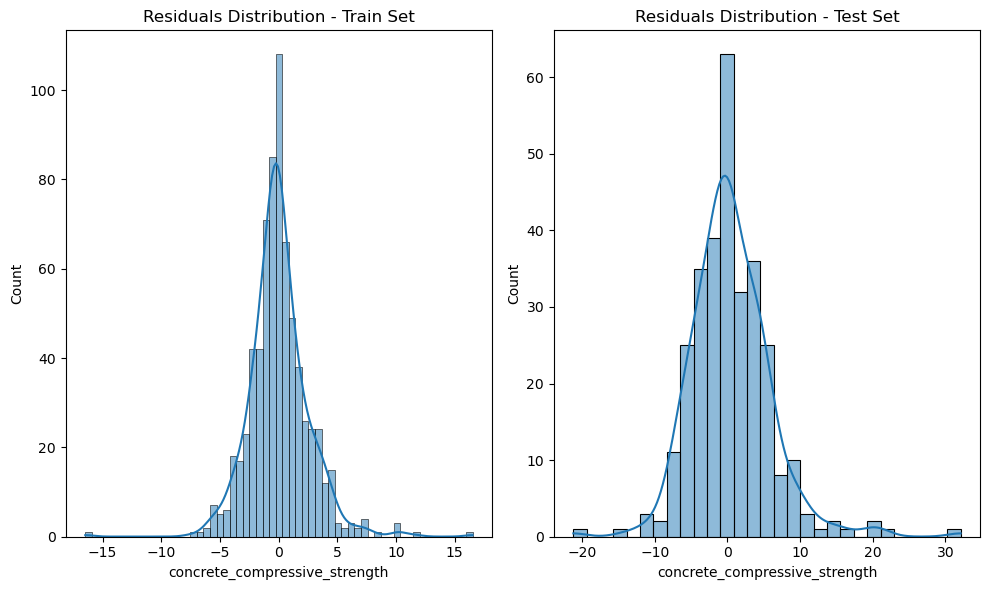

In [51]:
# Calculate residuals for train and test sets
rforest_residuals_train = y1_train - rforest_ypred_train
rforest_residuals_test = y1_test - rforest_ypred_test

# Plot residuals
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.histplot(rforest_residuals_train, kde=True)
plt.title('Residuals Distribution - Train Set')

plt.subplot(1,2,2)
sns.histplot(rforest_residuals_test, kde=True)
plt.title('Residuals Distribution - Test Set')

plt.tight_layout()
plt.show()


In [ ]:
# Filter rows in df_train where 'Difference' is less than -4 or greater than 4
filtered_df_train = df_train[(df_train['Difference'] < -4) | (df_train['Difference'] > 4)]

# Filter rows in df_test where 'Difference' is less than -4 or greater than 4
filtered_df_test = df_test[(df_test['Difference'] < -4) | (df_test['Difference'] > 4)]

# Save these dataframes to CSV files
filtered_df_train.to_csv('filtered_train_predictions.csv', index=False)
filtered_df_test.to_csv('filtered_test_predictions.csv', index=False)

# Print the filtered dataframes
print("Filtered training set actual vs predicted:")
print(filtered_df_train)

print("\nFiltered test set actual vs predicted:")
print(filtered_df_test)


In [ ]:
# Ensure the original dataframe 'df' has an index column
df.reset_index(inplace=True)

# Join df_train with the original df to get the remaining features
filtered_df_train_full = filtered_df_train.merge(df, left_index=True, right_index=True)

# Join df_test with the original df to get the remaining features
filtered_df_test_full = filtered_df_test.merge(df, left_index=True, right_index=True)

# Save these dataframes to CSV files
filtered_df_train_full.to_csv('filtered_train_predictions_full.csv', index=False)
filtered_df_test_full.to_csv('filtered_test_predictions_full.csv', index=False)

# Print the filtered dataframes
print("Filtered full training set:")
print(filtered_df_train_full)

print("\nFiltered full test set:")
print(filtered_df_test_full)


In [55]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_ypred_train = rf_model.predict(X_train)
rf_ypred_test = rf_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, reg_alpha=0.1, reg_lambda=10, gamma=0.01, max_depth=4)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (rf_ypred_train + xgb_ypred_train) / 2
hybrid_ypred_test = (rf_ypred_test + xgb_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 5 
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_score_hybrid = cross_val_score(rf_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_score_hybrid.mean())

Hybrid Model (Train) - R^2: 0.9347146688582781
Hybrid Model (Test) - R^2: 0.8849227109909252
Hybrid Model (Test) - RMSE: 5.859216632171753
Hybrid Model CV Score: 0.7606958738249339


In [ ]:
from catboost import CatBoostRegressor

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, reg_alpha=0.1, reg_lambda=10, gamma=0.01, max_depth=4)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (catboost_ypred_train + xgb_ypred_train) / 2
hybrid_ypred_test = (catboost_ypred_test + xgb_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10 
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_score_hybrid = cross_val_score(catboost_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_score_hybrid.mean())


In [62]:
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
lgb_ypred_train = lgb_model.predict(X_train)
lgb_ypred_test = lgb_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (xgb_ypred_train + catboost_ypred_train + lgb_ypred_train) / 3
hybrid_ypred_test = (xgb_ypred_test + catboost_ypred_test + lgb_ypred_test) / 3

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)

0:	learn: 15.1686986	total: 1.09ms	remaining: 108ms
1:	learn: 14.3908389	total: 2.22ms	remaining: 109ms
2:	learn: 13.6895297	total: 2.98ms	remaining: 96.5ms
3:	learn: 12.9792982	total: 3.72ms	remaining: 89.2ms
4:	learn: 12.4181844	total: 4.46ms	remaining: 84.7ms
5:	learn: 11.9197056	total: 5.21ms	remaining: 81.6ms
6:	learn: 11.4205425	total: 6.02ms	remaining: 79.9ms
7:	learn: 10.9986857	total: 6.79ms	remaining: 78.1ms
8:	learn: 10.6230289	total: 7.53ms	remaining: 76.1ms
9:	learn: 10.2424933	total: 8.28ms	remaining: 74.5ms
10:	learn: 9.9225915	total: 9.1ms	remaining: 73.6ms
11:	learn: 9.5789578	total: 9.77ms	remaining: 71.7ms
12:	learn: 9.2578103	total: 10.6ms	remaining: 71.1ms
13:	learn: 8.9323911	total: 11.4ms	remaining: 70.2ms
14:	learn: 8.6931274	total: 12.3ms	remaining: 69.5ms
15:	learn: 8.4195449	total: 13ms	remaining: 68.3ms
16:	learn: 8.2047551	total: 13.7ms	remaining: 66.9ms
17:	learn: 8.0230430	total: 14.5ms	remaining: 66ms
18:	learn: 7.8804079	total: 15.2ms	remaining: 64.9ms


In [66]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Perform k-fold cross-validation on the hybrid model (CatBoost)
k = 10 
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_score_hybrid = cross_val_score(catboost_model, X, y, scoring='r2', cv=kfold_hybrid)

# Fit and evaluate each model
hybrid_rmse_test_list = []
hybrid_r2_train_list = []
hybrid_r2_test_list = []

# XGBoost
xgb_model.fit(X_train, y_train)
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

# CatBoost
catboost_model.fit(X_train, y_train)
y_pred_train_catboost = catboost_model.predict(X_train)
y_pred_test_catboost = catboost_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (y_pred_train_xgb + y_pred_train_gb + y_pred_train_catboost) / 3
hybrid_ypred_test = (y_pred_test_xgb + y_pred_test_gb + y_pred_test_catboost) / 3

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Print scores
print("Cross-Validation Score (CatBoost): ", CV_score_hybrid.mean())
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)


0:	learn: 15.4512152	total: 2.59ms	remaining: 257ms
1:	learn: 14.6093765	total: 4.93ms	remaining: 242ms
2:	learn: 13.8850878	total: 6.91ms	remaining: 224ms
3:	learn: 13.1560570	total: 8.83ms	remaining: 212ms
4:	learn: 12.5386412	total: 11ms	remaining: 209ms
5:	learn: 12.0404976	total: 13.1ms	remaining: 205ms
6:	learn: 11.5565690	total: 14.3ms	remaining: 189ms
7:	learn: 11.1226302	total: 15.3ms	remaining: 176ms
8:	learn: 10.7026630	total: 16.5ms	remaining: 166ms
9:	learn: 10.3402635	total: 17.6ms	remaining: 158ms
10:	learn: 10.0072214	total: 18.9ms	remaining: 153ms
11:	learn: 9.6253124	total: 20.1ms	remaining: 148ms
12:	learn: 9.3110377	total: 21.3ms	remaining: 143ms
13:	learn: 9.0464173	total: 22.4ms	remaining: 138ms
14:	learn: 8.8046440	total: 23.7ms	remaining: 134ms
15:	learn: 8.5341913	total: 24.8ms	remaining: 130ms
16:	learn: 8.3206400	total: 26.2ms	remaining: 128ms
17:	learn: 8.1661647	total: 27.3ms	remaining: 124ms
18:	learn: 8.0142741	total: 28.5ms	remaining: 121ms
19:	learn: 7.

In [68]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
lgb_ypred_train = lgb_model.predict(X_train)
lgb_ypred_test = lgb_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (xgb_ypred_train + lgb_ypred_train) / 2
hybrid_ypred_test = (xgb_ypred_test + lgb_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())



Hybrid Model (Train) - R^2: 0.9756886223612309
Hybrid Model (Test) - R^2: 0.9307331865652084
Hybrid Model (Test) - RMSE: 4.545768853896565
Hybrid Model CV Score: 0.9360226231634435


In [69]:
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (xgb_ypred_train + catboost_ypred_train) / 2
hybrid_ypred_test = (xgb_ypred_test + catboost_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())


0:	learn: 15.1686986	total: 1.19ms	remaining: 118ms
1:	learn: 14.3908389	total: 2.3ms	remaining: 113ms
2:	learn: 13.6895297	total: 2.99ms	remaining: 96.8ms
3:	learn: 12.9792982	total: 3.71ms	remaining: 89ms
4:	learn: 12.4181844	total: 4.41ms	remaining: 83.8ms
5:	learn: 11.9197056	total: 5.11ms	remaining: 80ms
6:	learn: 11.4205425	total: 5.92ms	remaining: 78.6ms
7:	learn: 10.9986857	total: 6.67ms	remaining: 76.7ms
8:	learn: 10.6230289	total: 7.31ms	remaining: 74ms
9:	learn: 10.2424933	total: 7.99ms	remaining: 71.9ms
10:	learn: 9.9225915	total: 8.69ms	remaining: 70.3ms
11:	learn: 9.5789578	total: 9.39ms	remaining: 68.9ms
12:	learn: 9.2578103	total: 10ms	remaining: 67.2ms
13:	learn: 8.9323911	total: 10.7ms	remaining: 65.9ms
14:	learn: 8.6931274	total: 11.6ms	remaining: 65.8ms
15:	learn: 8.4195449	total: 12.4ms	remaining: 65.1ms
16:	learn: 8.2047551	total: 13.1ms	remaining: 64.1ms
17:	learn: 8.0230430	total: 13.8ms	remaining: 62.9ms
18:	learn: 7.8804079	total: 14.6ms	remaining: 62.4ms
19:	

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting
gb_ypred_train = gb_model.predict(X_train)
gb_ypred_test = gb_model.predict(X_test)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (gb_ypred_train + catboost_ypred_train) / 2
hybrid_ypred_test = (gb_ypred_test + catboost_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(gb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())


In [71]:
df1.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [72]:
X = df1.drop(['concrete_compressive_strength'], axis=1)
y = df1['concrete_compressive_strength']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting
gb_ypred_train = gb_model.predict(X_train)
gb_ypred_test = gb_model.predict(X_test)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (gb_ypred_train + catboost_ypred_train) / 2
hybrid_ypred_test = (gb_ypred_test + catboost_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(gb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())

Hybrid Model (Train) - R^2: 0.9767393973327069
Hybrid Model (Test) - R^2: 0.9252364634428873
Hybrid Model (Test) - RMSE: 4.451086209945524
Hybrid Model CV Score: 0.9343305792579468


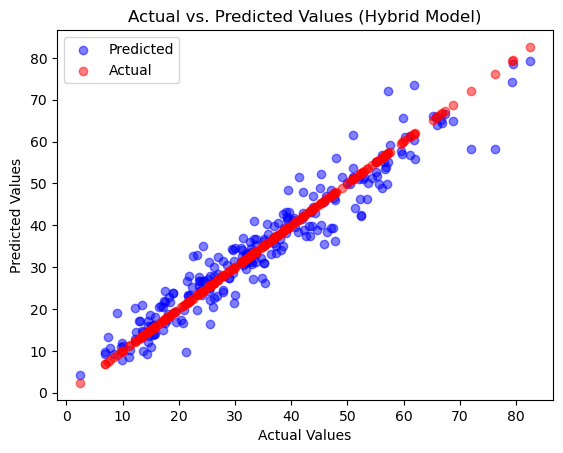

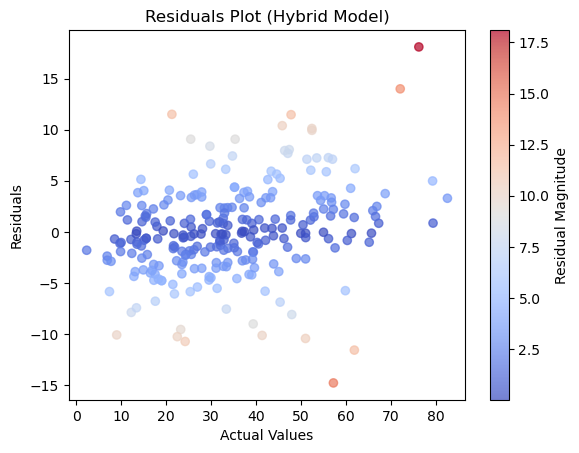

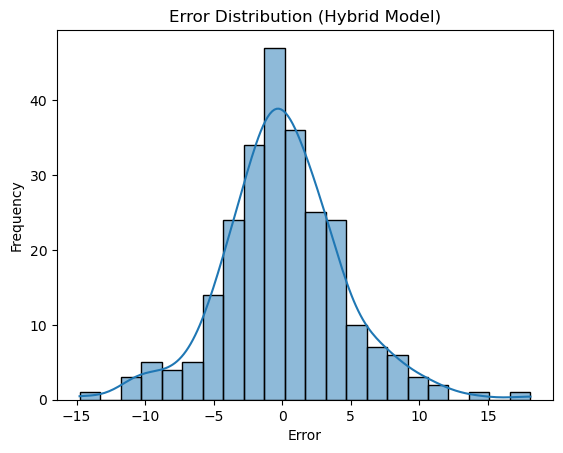

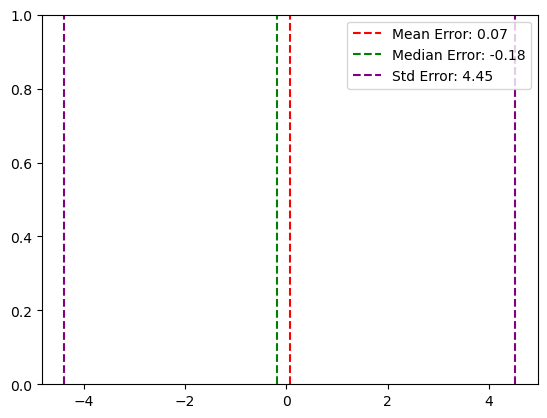

In [86]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
lgb_ypred_train = lgb_model.predict(X_train)
lgb_ypred_test = lgb_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (xgb_ypred_train + lgb_ypred_train) / 2
hybrid_ypred_test = (xgb_ypred_test + lgb_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())


# Scatter plot for actual vs. predicted values on test set
plt.scatter(y_test, hybrid_ypred_test, c='b', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='r', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Hybrid Model)")
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - hybrid_ypred_test

# Define colors for bubbles based on the magnitude of residuals
colors = np.abs(residuals)

# Scatter plot for residuals
plt.scatter(y_test, residuals, c=colors, cmap='coolwarm', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Hybrid Model)")
plt.colorbar(label='Residual Magnitude')
plt.show()




errors = y_test - hybrid_ypred_test

# Error distribution plot
sns.histplot(errors, kde=True)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (Hybrid Model)")
plt.show()

# Calculate central tendency
mean_error = np.mean(errors)
median_error = np.median(errors)

# Calculate spread
std_error = np.std(errors)

# Display statistics
plt.axvline(mean_error, color='red', linestyle='--', label=f"Mean Error: {mean_error:.2f}")
plt.axvline(median_error, color='green', linestyle='--', label=f"Median Error: {median_error:.2f}")
plt.axvline(mean_error + std_error, color='purple', linestyle='--', label=f"Std Error: {std_error:.2f}")
plt.axvline(mean_error - std_error, color='purple', linestyle='--')

plt.legend()
plt.show()


0:	learn: 15.4139647	total: 1.11ms	remaining: 110ms
1:	learn: 14.7412884	total: 2.11ms	remaining: 103ms
2:	learn: 14.0311177	total: 2.8ms	remaining: 90.6ms
3:	learn: 13.3018746	total: 3.73ms	remaining: 89.6ms
4:	learn: 12.6534922	total: 4.45ms	remaining: 84.5ms
5:	learn: 12.1358789	total: 5.13ms	remaining: 80.4ms
6:	learn: 11.7127242	total: 5.77ms	remaining: 76.7ms
7:	learn: 11.2488879	total: 6.42ms	remaining: 73.9ms
8:	learn: 10.8380106	total: 7.07ms	remaining: 71.5ms
9:	learn: 10.4430070	total: 7.75ms	remaining: 69.8ms
10:	learn: 10.0961894	total: 8.46ms	remaining: 68.4ms
11:	learn: 9.7267491	total: 9.14ms	remaining: 67ms
12:	learn: 9.4544391	total: 9.78ms	remaining: 65.5ms
13:	learn: 9.1247776	total: 10.5ms	remaining: 64.2ms
14:	learn: 8.8944892	total: 11.1ms	remaining: 62.9ms
15:	learn: 8.6758584	total: 11.7ms	remaining: 61.7ms
16:	learn: 8.4414288	total: 12.4ms	remaining: 60.5ms
17:	learn: 8.2583019	total: 13.2ms	remaining: 60.2ms
18:	learn: 8.1431126	total: 13.9ms	remaining: 59.1

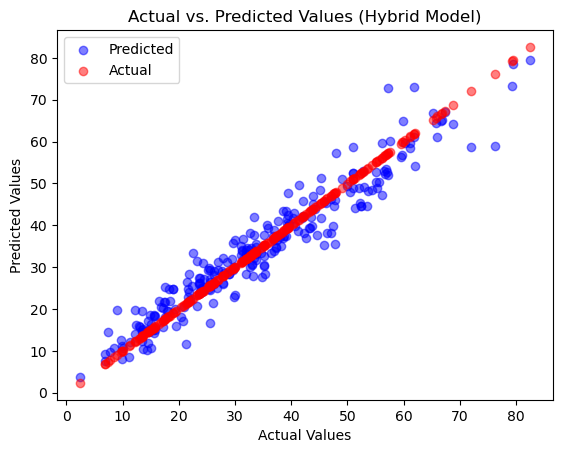

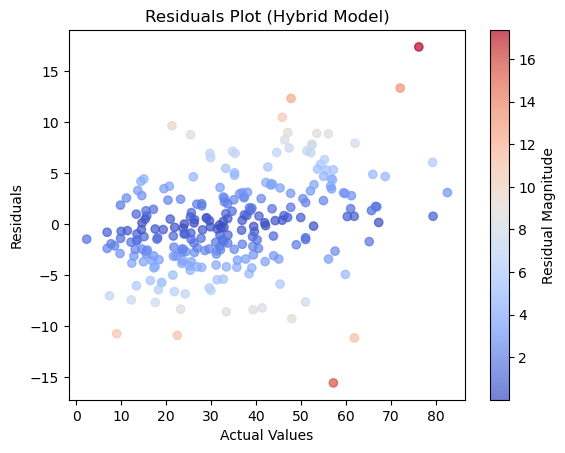

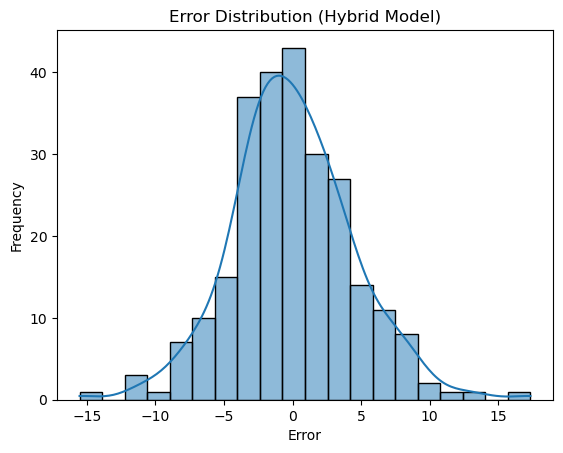

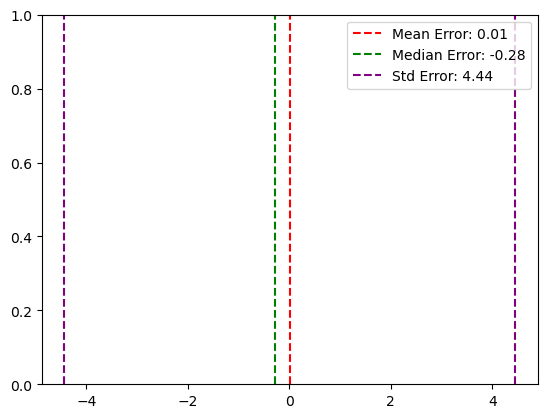

In [85]:
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from scipy.stats import mode
# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=4, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
xgb_ypred_train = xgb_model.predict(X_train)
xgb_ypred_test = xgb_model.predict(X_test)

# CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=4, random_state=42)

# Fit the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions with CatBoost
catboost_ypred_train = catboost_model.predict(X_train)
catboost_ypred_test = catboost_model.predict(X_test)

# Combine predictions
hybrid_ypred_train = (xgb_ypred_train + catboost_ypred_train) / 2
hybrid_ypred_test = (xgb_ypred_test + catboost_ypred_test) / 2

# Calculate metrics for hybrid model
hybrid_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid_ypred_test))
hybrid_r2_train = r2_score(y_train, hybrid_ypred_train)
hybrid_r2_test = r2_score(y_test, hybrid_ypred_test)

# Perform k-fold cross-validation on the hybrid model
k = 10
kfold_hybrid = KFold(n_splits=k, random_state=42, shuffle=True)
CV_scores_hybrid = cross_val_score(xgb_model, X, y, scoring='r2', cv=kfold_hybrid)

# Print metrics for the hybrid model
print("Hybrid Model (Train) - R^2:", hybrid_r2_train)
print("Hybrid Model (Test) - R^2:", hybrid_r2_test)
print("Hybrid Model (Test) - RMSE:", hybrid_rmse_test)
print("Hybrid Model CV Score:", CV_scores_hybrid.mean())


# Scatter plot for actual vs. predicted values on test set
plt.scatter(y_test, hybrid_ypred_test, c='b', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='r', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Hybrid Model)")
plt.legend()
plt.show()

# Calculate residuals
residuals = y_test - hybrid_ypred_test

# Define colors for bubbles based on the magnitude of residuals
colors = np.abs(residuals)

# Scatter plot for residuals
plt.scatter(y_test, residuals, c=colors, cmap='coolwarm', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Hybrid Model)")
plt.colorbar(label='Residual Magnitude')
plt.show()




errors = y_test - hybrid_ypred_test

# Error distribution plot
sns.histplot(errors, kde=True)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (Hybrid Model)")
plt.show()

# Calculate central tendency
mean_error = np.mean(errors)
median_error = np.median(errors)

# Calculate spread
std_error = np.std(errors)

# Display statistics
plt.axvline(mean_error, color='red', linestyle='--', label=f"Mean Error: {mean_error:.2f}")
plt.axvline(median_error, color='green', linestyle='--', label=f"Median Error: {median_error:.2f}")
plt.axvline(mean_error + std_error, color='purple', linestyle='--', label=f"Std Error: {std_error:.2f}")
plt.axvline(mean_error - std_error, color='purple', linestyle='--')

plt.legend()
plt.show()